<center><img src="https://img.freepik.com/free-photo/axis-cnc-mills-machines-design-configuration-that-utilizes-swivel-head-machine-table-flush-with-surface-metalworking-industrial_67340-733.jpg?w=996" width="720"></center>

<center><font size=6>Machine Failure Prediction</font></center>

## Problem Statement

### Business Context

System failure is a common issue across the manufacturing industry, where a variety of machines and equipment are used. In most cases, it becomes important to be able to predict machine failures by analyzing system data and taking preventive measures to be able to tackle them. This is known as predictive maintenance and with the rising availability of data and computational resources, the use of such data-driven, proactive maintenance methods has resulted in several benefits like minimized downtime of the equipment, minimized cost associated with spares and supplies, etc.

AutoMobi Engineering Pvt. Ltd is an auto component manufacturing company. The manufacturing facility of AutoMobi consists of numerous products machined on several CNC (Computer Numerical Controlled) machines. In an attempt to transition to a data-driven maintenance process, the company had set up sensors in various locations to collect data regarding the various parameters involved in the manufacturing process. Initially, they want to try it in an injector nozzle manufacturing shop where they are manufacturing fuel injector nozzles for automobile engines using various manufacturing processes (like turning, drilling, etc). The company has been collecting data on an hourly basis from these sensors and aims to build ML-based solutions using the data to optimize cost, improve failure predictability, and minimize the downtime of equipment.

### Objective

AutoMobi has recently been encountering a problem with frequent equipment failure in the fuel injector nozzle manufacture unit, leading to disturbance in the manufacturing process. They have reached out to the Data Science team for a solution and shared data for the past three months. As a member of the Data Science team, you are tasked with analyzing the data and developing a Machine Learning model to detect potential machine failures, determine the most influencing factors on machine health, and provide recommendations for cost optimization to the management.

### Data Description

The data contains the different attributes of machines and health. The detailed data dictionary is given below.

**Data Dictionary**

* UDI: Unique identifier ranging from 1 to 10000
* Type: The type of product consisting of low(60% of all products), medium(30%), and high(10%) quality corresponding to L, M, and H
* Air temperature: Ambient temperature (in the machine shop) measured in Kelvin
* Process Temperature: Tool tip temperature measured in Kelvin
* Rotational Speed: Rotational speed of the machine spindle measured in revolutions per minute (rpm)
* Torque: Torque acting on the machine spindle measured in Newton meter (Nm)
* Tool wear: Tool wear measured in micrometers (During the manufacturing process, continuous rubbing of the tool on the workpiece leads to the wearing of the tool material. The tool wear is measured as the amount of wear on the cutting face of the tool measured in micrometers)
* Failure: 0-No failure, 1-Failure

## Importing the necessary libraries

In [265]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [267]:
# uncomment and run the following line if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [268]:
machine_failure_data = pd.read_csv("/machine_failure_data.csv")

In [269]:
# copying data to another variable to avoid any changes to original data
data = machine_failure_data.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset.

In [272]:
data.head()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,1,M,298.1,323.740741,1551,42.8,0,0
1,2,L,298.2,324.111111,1408,46.3,3,0
2,3,L,298.1,323.370370,1498,49.4,5,0
3,4,L,298.2,323.740741,1433,39.5,7,0
4,5,L,298.2,324.111111,1408,40.0,9,0


In [273]:
data.tail()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
9995,9996,M,298.8,323.000000,1604,29.5,14,0
9996,9997,H,298.9,323.000000,1632,31.8,17,0
9997,9998,M,299.0,323.740741,1645,33.4,22,0
9998,9999,H,299.0,324.111111,1408,48.5,25,0
9999,10000,M,299.0,324.111111,1500,40.2,30,0


* There are three types of products those are L, M, and H (Low, Medium, and High quality).
* The `UDI` column is containing unique values.


### Understand the shape of the dataset.

In [276]:
data.shape

(10000, 8)

* The dataset has 10000 rows and 8 columns.

### Check the data types of the columns for the dataset.

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Type                 10000 non-null  object 
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Failure              10000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 625.1+ KB


* The `Type` column is of *object* type while the rest columns are numeric in nature


### Checking for missing values

In [282]:
# checking for null values
data.isnull().sum()

UDI                    0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Failure                0
dtype: int64

* There are no null values in the dataset

### Dropping the duplicate values

In [285]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data.

#### Dropping the columns with all unique values

In [288]:
data.UDI.nunique()

10000

* The `UDI` column contains only unique values, so we can drop it

In [290]:
data = data.drop(["UDI"], axis=1)

### Statistical summary of the data

**Let's check the statistical summary of the data.**

In [293]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.0,300.004930,2.000259,295.3,298.300000,300.100000,301.5,304.5
Process temperature,10000.0,328.946519,5.495312,313.0,324.481481,329.296296,333.0,343.0
Rotational speed,10000.0,1538.776100,179.284096,1168.0,1423.000000,1503.000000,1612.0,2886.0
Torque,10000.0,39.986910,9.968934,3.8,33.200000,40.100000,46.8,76.6
Tool wear,10000.0,107.951000,63.654147,0.0,53.000000,108.000000,162.0,253.0
Failure,10000.0,0.033900,0.180981,0.0,0.000000,0.000000,0.0,1.0


* The `air temperature` ranges from 300K to 304.5K. Usually, machine shops are maintained in control environment so the temperature range looks usual.
* The `process temperature` is a bit higher than the `air temperature` and that's quite usual because heat is continuously generated during the machining process.
* The `rotational speed` has a max value of 2886rpm while 1612rpm at the 75th percentile. Some of the processes are performed at a higher speed than usual.

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [298]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [299]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [300]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [301]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

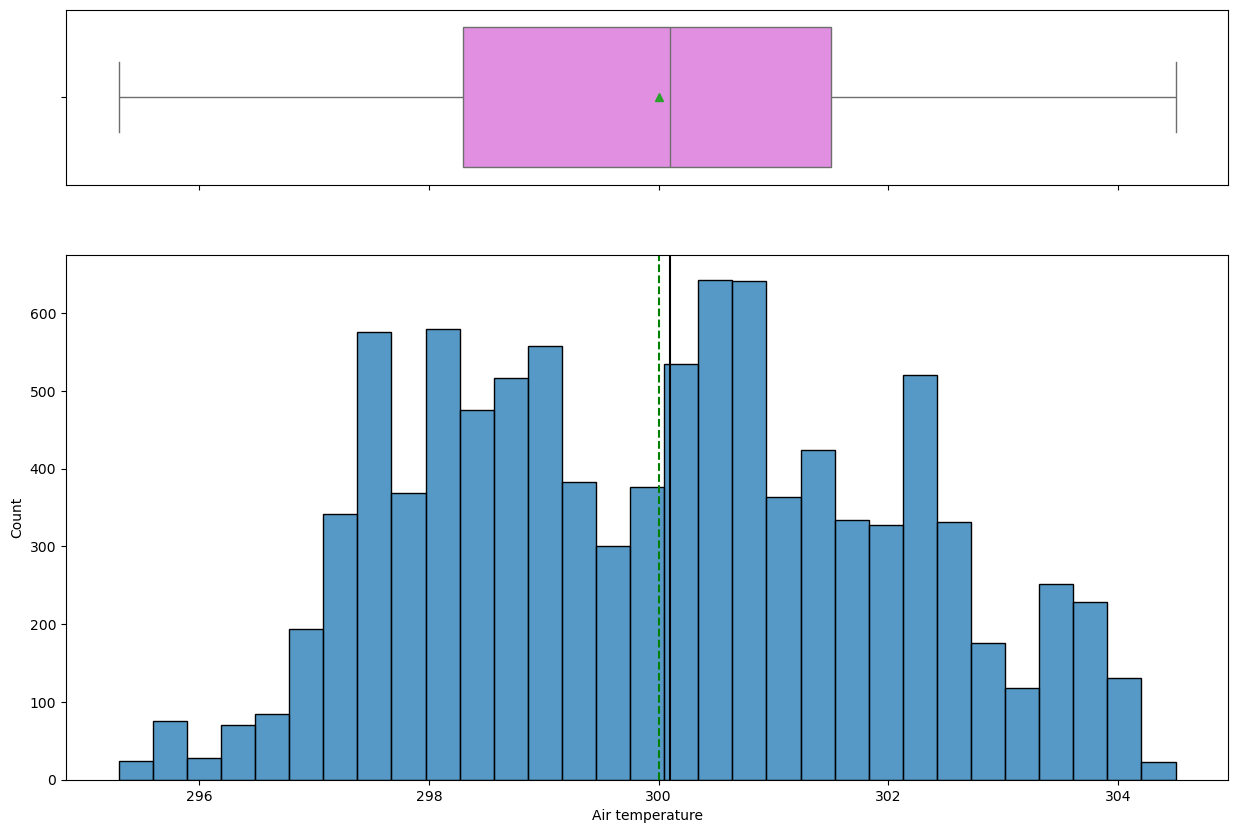

In [303]:
histogram_boxplot(data, "Air temperature")

* The `air temperature` distribution looks slightly left skewed with a mean temperature around 300K.
* There is no outlier present.

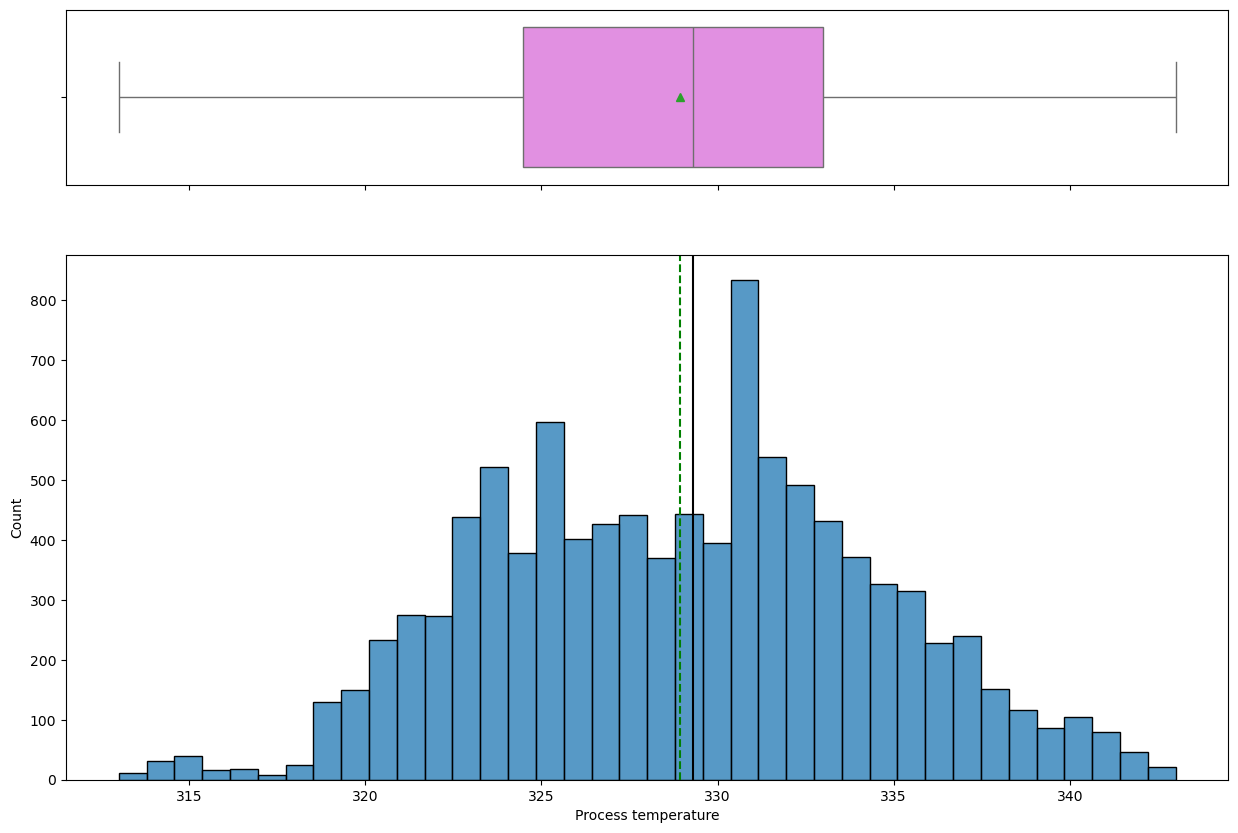

In [305]:
histogram_boxplot(data, "Process temperature")

* The `process temperature` distribution looks slightly left skewed with a mean temperature around 329K.
* There is no outlier present.

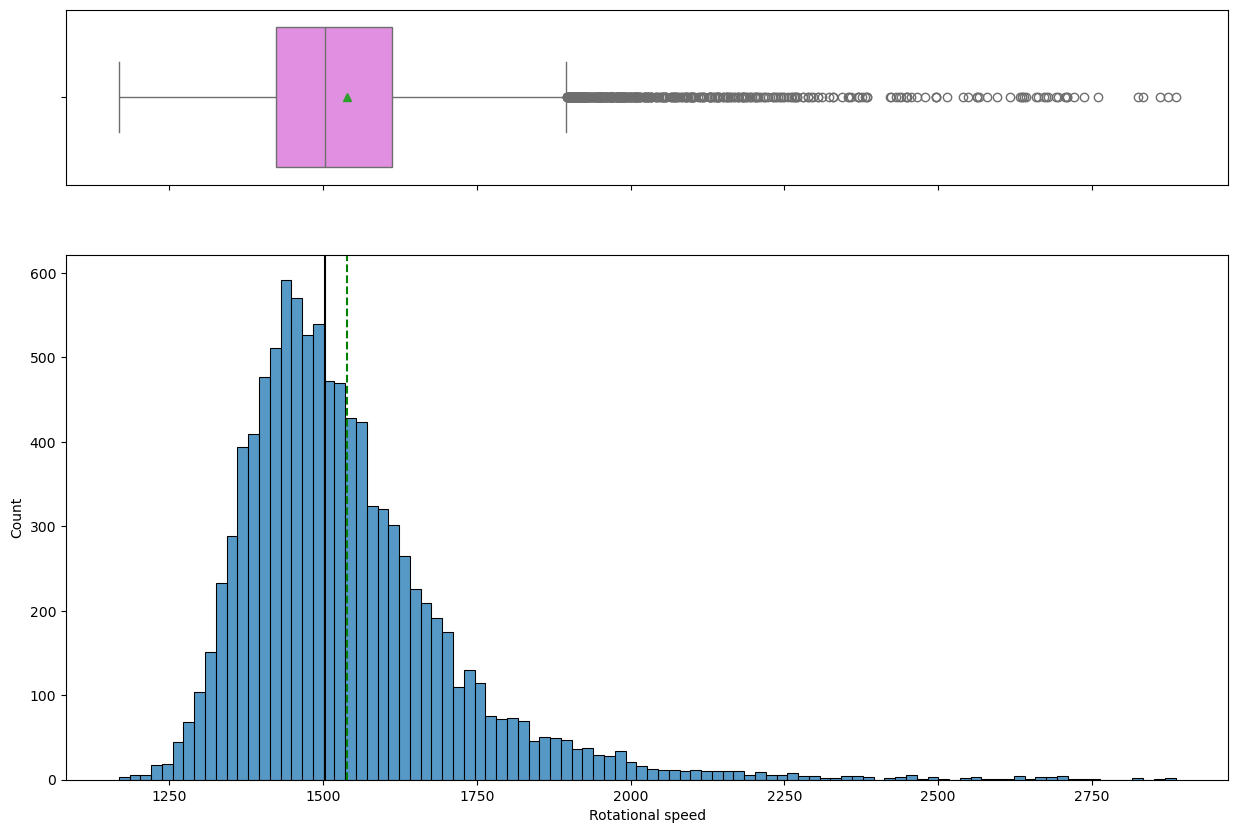

In [307]:
histogram_boxplot(data, "Rotational speed")

* The `rotational speed` is right skewed with many outliers on the upper quartile.
* Some of the manufacturing operations are performed at a higher speed.

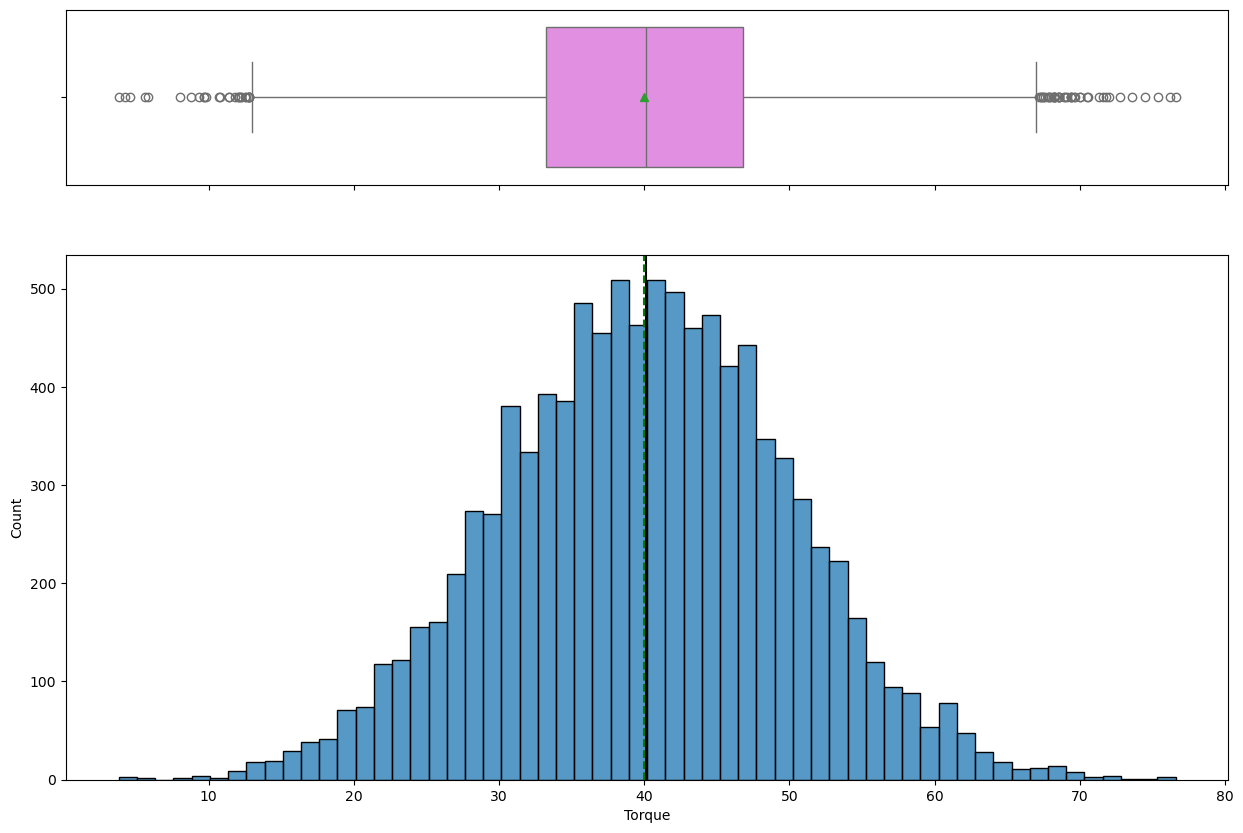

In [309]:
histogram_boxplot(data, "Torque")

* The distribution of `torque` is normal with mean torque around 40 Nm.
* Outliers are present on both sides.

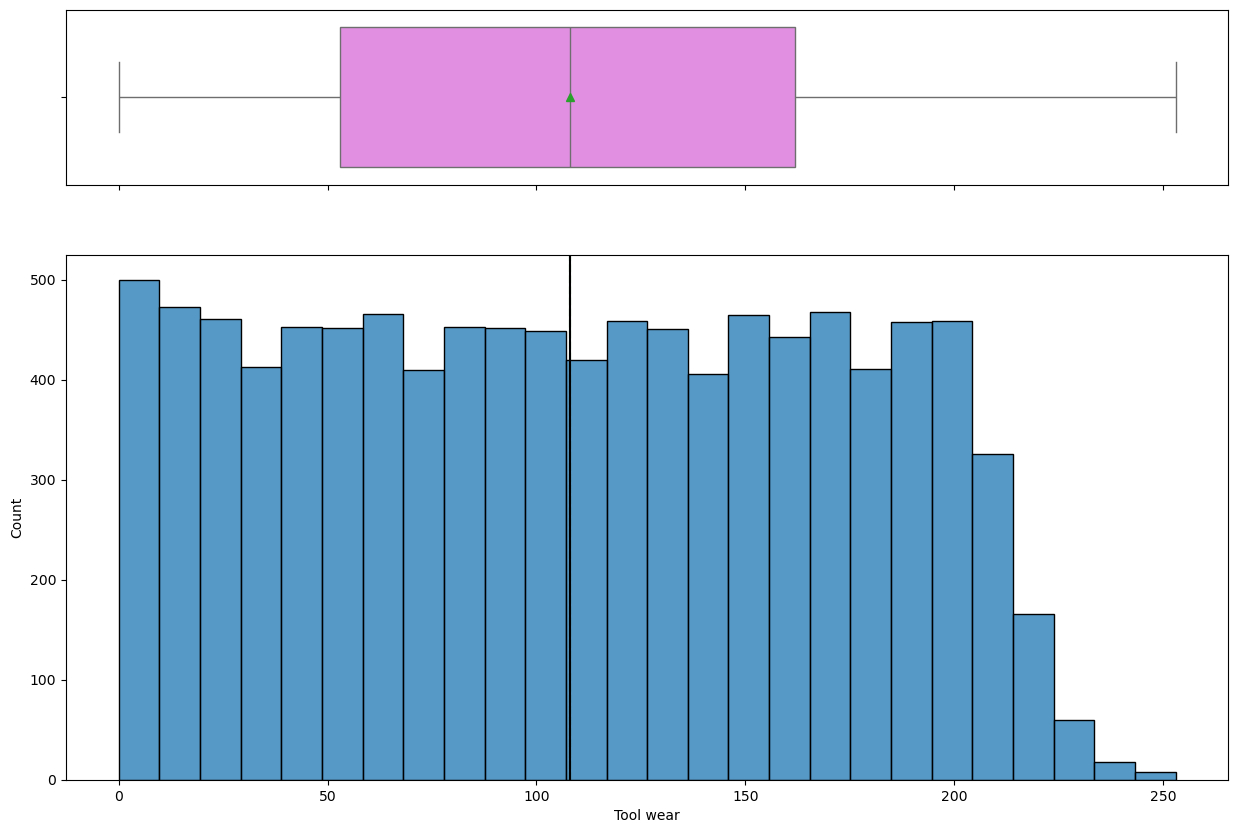

In [311]:
histogram_boxplot(data, "Tool wear")

* `Tool wear` is uniformly distributed with some of the higher values being less frequent.

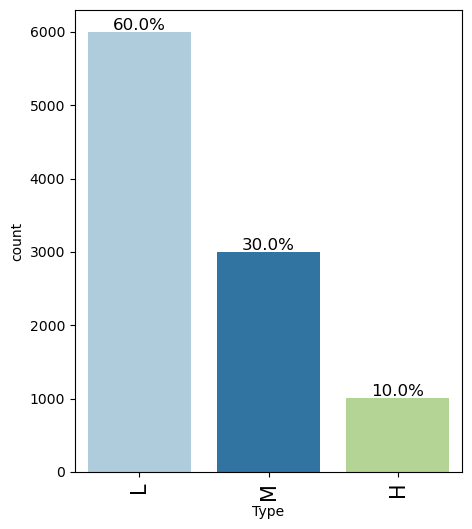

In [313]:
labeled_barplot(data, "Type", perc=True)

* Around 60% of products are of low quality, 30% are of medium quality whereas 10% are of high quality

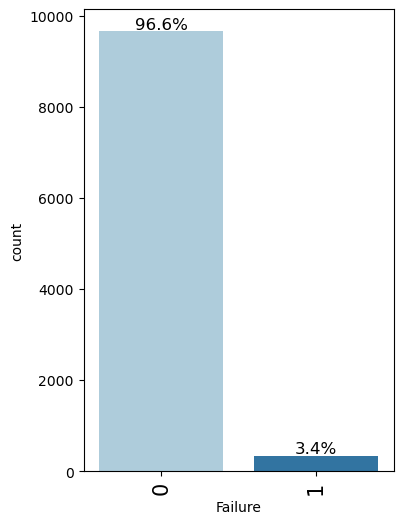

In [315]:
labeled_barplot(data, "Failure", perc=True)

* In 96.6% of observations the machine does not fail while in 3.4% of observations it fails.

### Bivariate Analysis

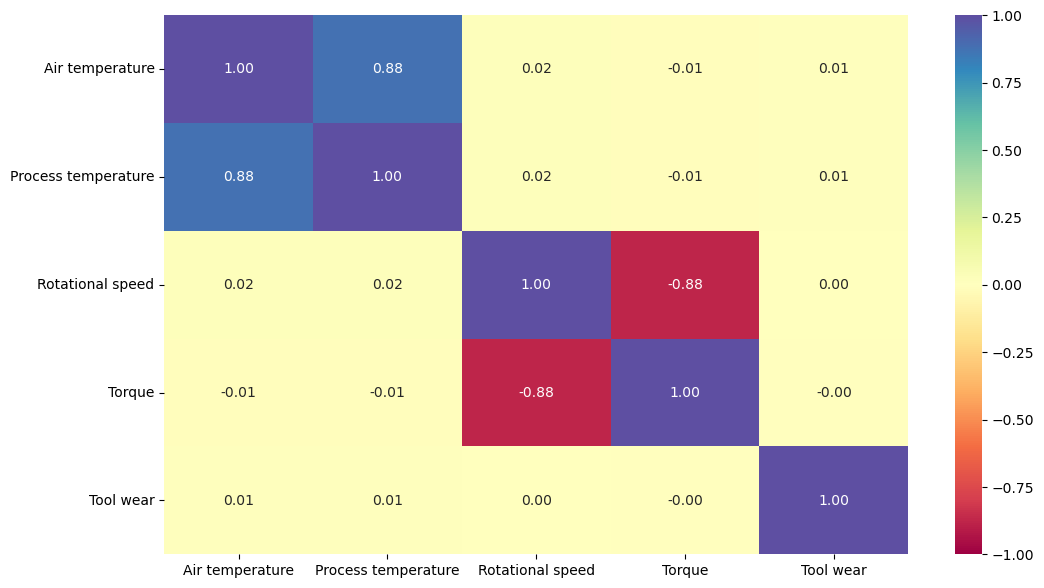

In [318]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('Failure')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a positive correlation between the `air temperature` and `process temperature`.
* There's a negative correlation between the `rotational speed` and `torque`.
* No other variables are correlated. We will analyze it further.

**Let's see how the target variable varies across the type of the product**

Failure     0    1    All
Type                     
All      9661  339  10000
L        5765  235   6000
M        2914   83   2997
H         982   21   1003
------------------------------------------------------------------------------------------------------------------------


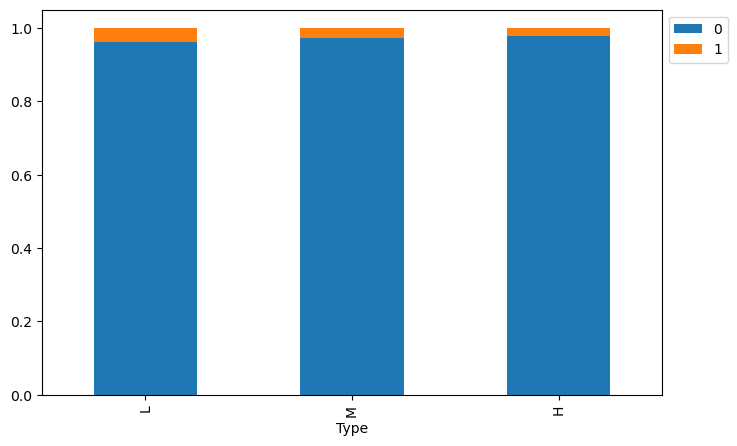

In [321]:
stacked_barplot(data, "Type", "Failure")

* Around 70 % of the failure occurred during machining of L type i.e., low-quality products.
* Machining of high-quality products is less prone to failure.

**Let's analyze the relation between `Process temperature` and `Failure`.**

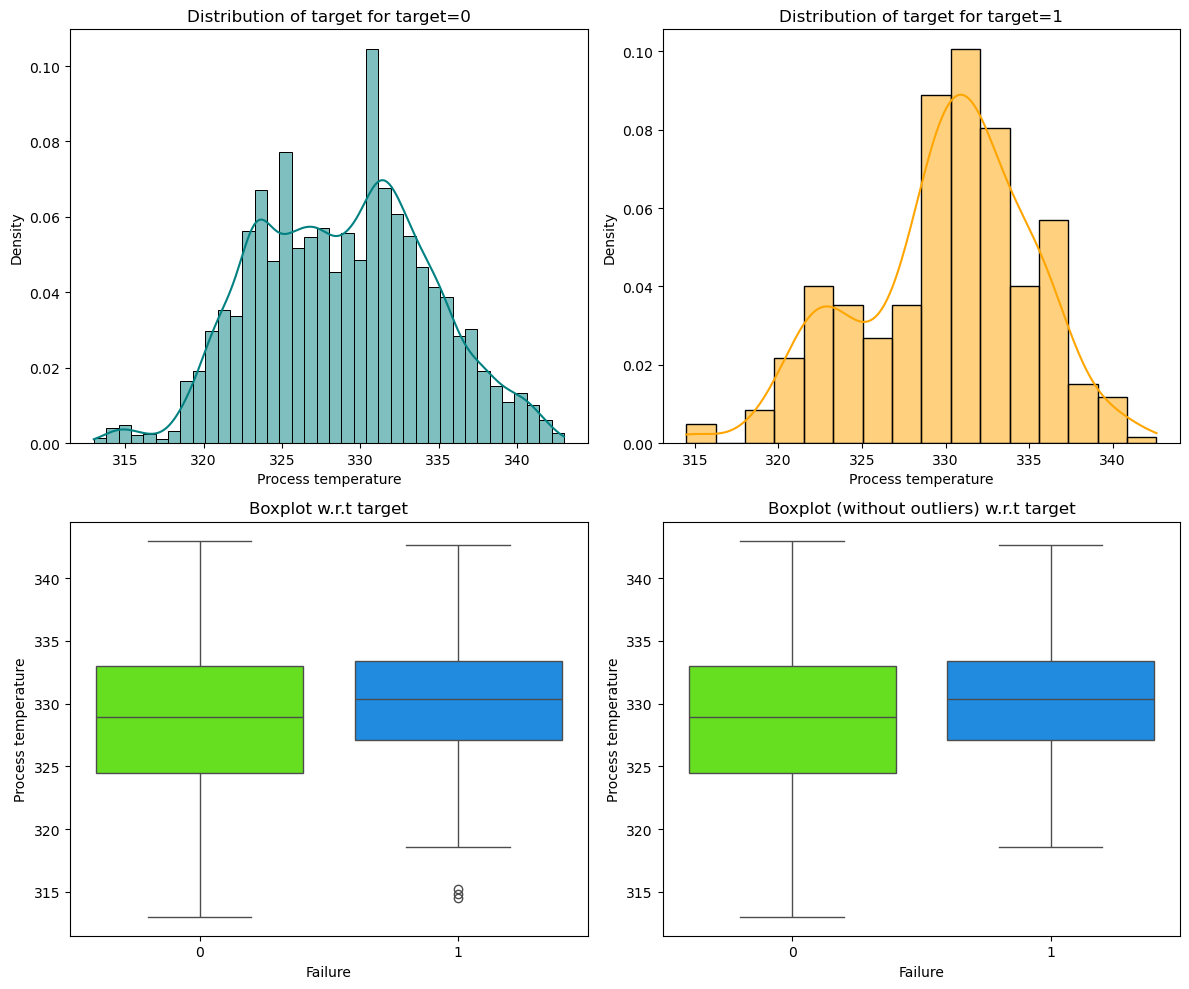

In [324]:
distribution_plot_wrt_target(data, "Process temperature", "Failure")

* Most of the failures of the manufacturing system occur at higher `Process temperature`.

**Let's analyze the relation between `Rotational speed` and `Failure`.**

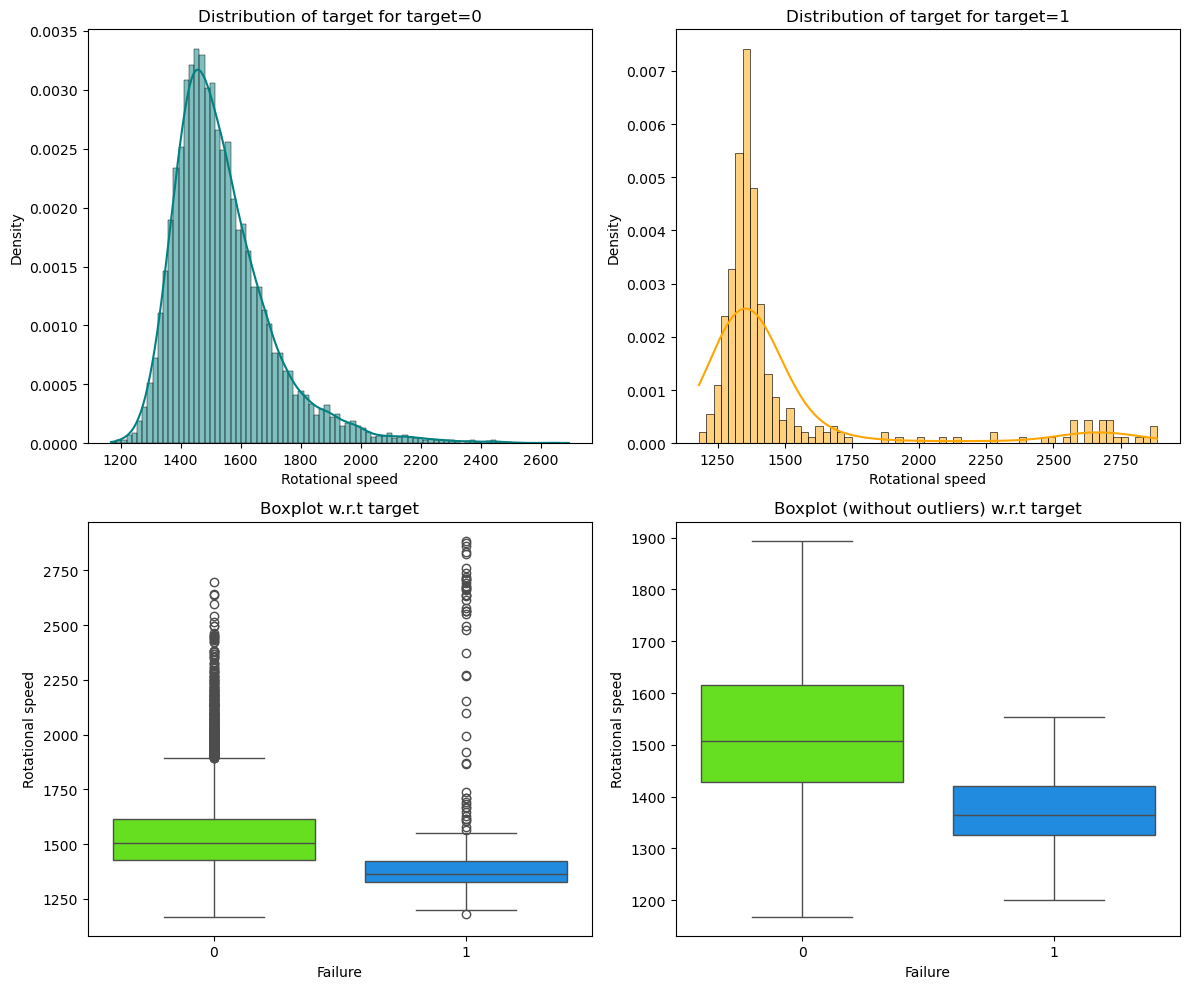

In [327]:
distribution_plot_wrt_target(data, "Rotational speed", "Failure")

* There is a clear boundary showing separation of failure status based of the values of `Rotational speed`.
* Manufacturing system is more prone to failure at lower `Rotational speed` than at higher rotational speed.

## Data Preprocessing

### Outlier Detection

**Let's check for outliers in the data.**

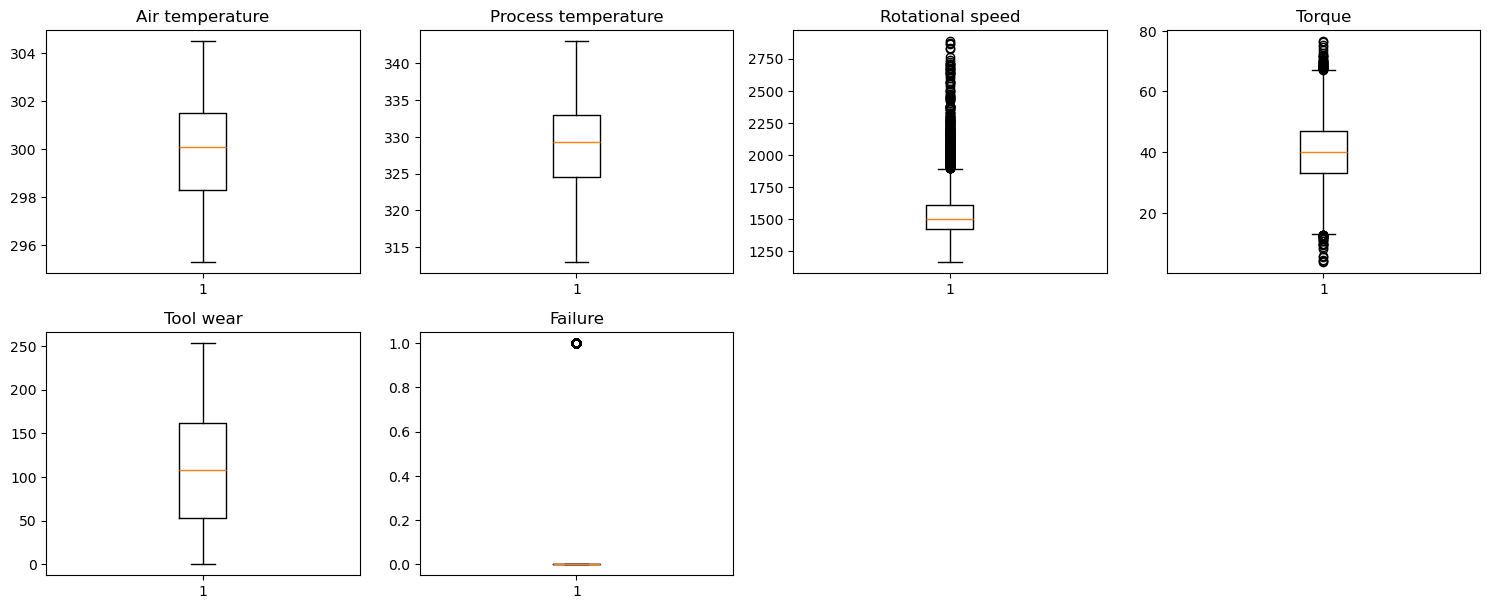

In [332]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

### Data Preparation for Modeling

In [335]:
X = data.drop(["Failure"], axis=1)
Y = data["Failure"]

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [336]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7000, 7)
Shape of test set :  (3000, 7)
Percentage of classes in training set:
Failure
0    0.966286
1    0.033714
Name: proportion, dtype: float64
Percentage of classes in test set:
Failure
0    0.965667
1    0.034333
Name: proportion, dtype: float64


* We had seen that around 96.6% of observations belongs to class 0 (Not Failed) and 3.37% observations belongs to class 1 (Failed), and this is preserved in the train and test sets

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
- Predicting a machine will not fail but in reality, the machine will fail (FN)
- Predicting a machine will fail but in reality, the machine will not fail (FP)

**Which case is more important?**

- If we predict that a machine will not fail but in reality, the machine fails, then the company will have to bear the cost of repair/replacement and also face equipment downtime losses
- If we predict that a machine will fail but in reality, the machine does not fail, then the company will have to bear the cost of inspection
- The inspection cost is generally less compared to the repair/replacement cost

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [341]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [342]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree (default)

In [344]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

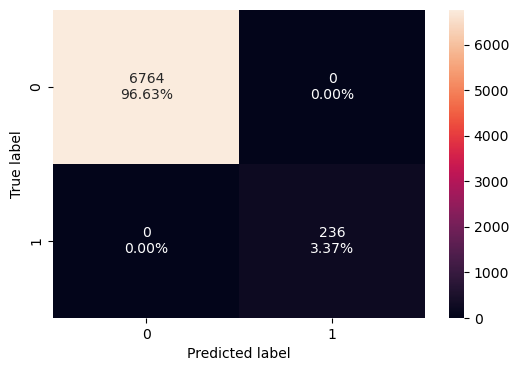

In [345]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [346]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


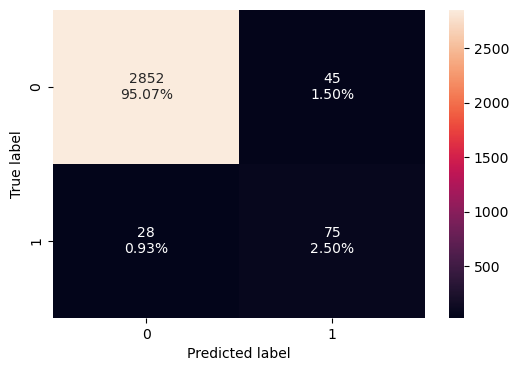

In [347]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [348]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.975667,0.728155,0.625,0.672646


### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [351]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

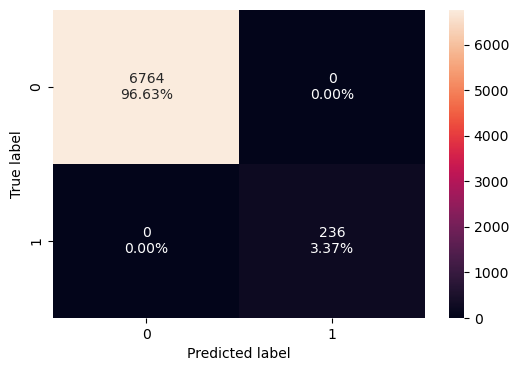

In [352]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [353]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

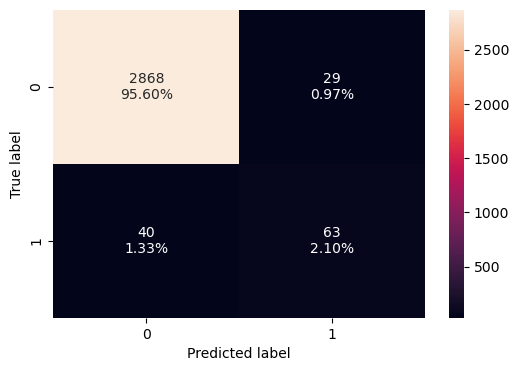

In [355]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [356]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.977,0.61165,0.684783,0.646154


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

In [361]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 6
Max leaf nodes: 50
Min samples split: 70
Best test recall score: 0.970873786407767


In [362]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=70, random_state=42)

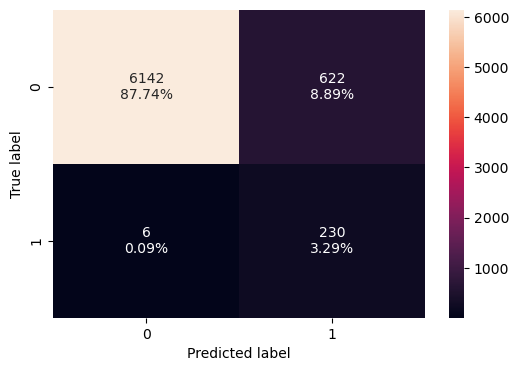

In [363]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [364]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.910286,0.974576,0.269953,0.422794


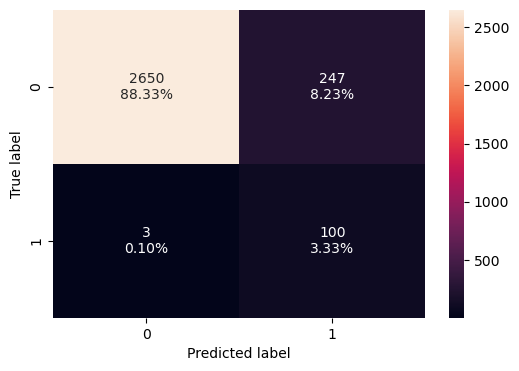

In [365]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [366]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.916667,0.970874,0.288184,0.444444




* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.97 which shows that the model is able to generalize well on unseen data.

In [368]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

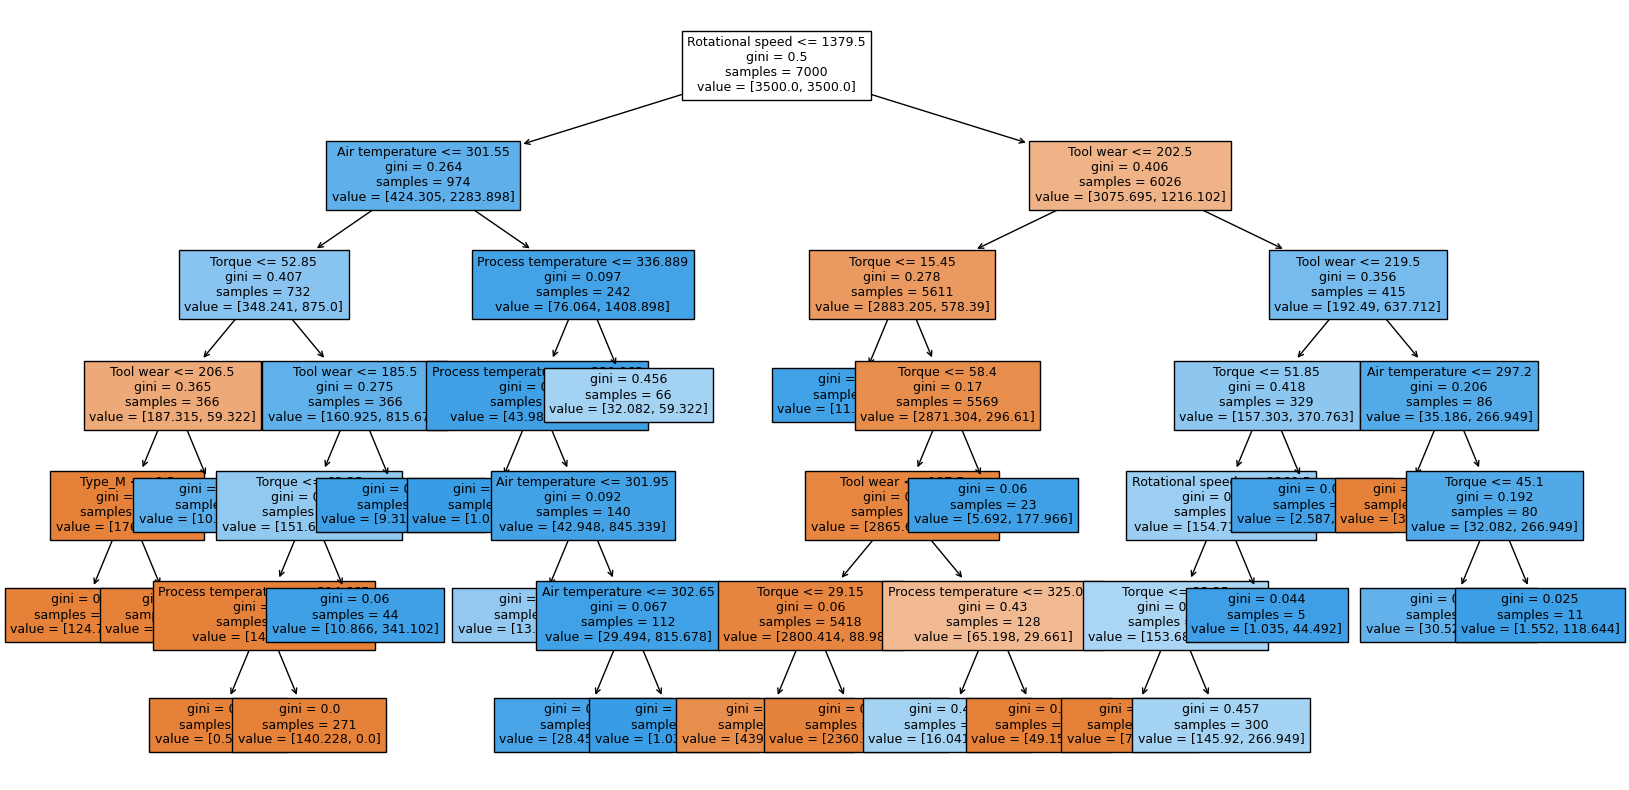

In [369]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [370]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Rotational speed <= 1379.50
|   |--- Air temperature <= 301.55
|   |   |--- Torque <= 52.85
|   |   |   |--- Tool wear <= 206.50
|   |   |   |   |--- Type_M <= 0.50
|   |   |   |   |   |--- weights: [124.70, 0.00] class: 0
|   |   |   |   |--- Type_M >  0.50
|   |   |   |   |   |--- weights: [52.26, 0.00] class: 0
|   |   |   |--- Tool wear >  206.50
|   |   |   |   |--- weights: [10.35, 59.32] class: 1
|   |   |--- Torque >  52.85
|   |   |   |--- Tool wear <= 185.50
|   |   |   |   |--- Torque <= 62.35
|   |   |   |   |   |--- Process temperature <= 314.67
|   |   |   |   |   |   |--- weights: [0.52, 0.00] class: 0
|   |   |   |   |   |--- Process temperature >  314.67
|   |   |   |   |   |   |--- weights: [140.23, 0.00] class: 0
|   |   |   |   |--- Torque >  62.35
|   |   |   |   |   |--- weights: [10.87, 341.10] class: 1
|   |   |   |--- Tool wear >  185.50
|   |   |   |   |--- weights: [9.31, 474.58] class: 1
|   |--- Air temperature >  301.55
|   |   |--- Process temperatur

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the rotational speed is less than or equal to 1379.50, the air temperature is less than or equal to 301.55, the torque is less than or equal to 52.85 and the tool wear is greater than 206.50, then the machine is most likey to fail

**Note**: Interpretations from other decision rules can be made similarly.

In [372]:
importances = model2.feature_importances_
importances

array([3.01991323e-02, 1.36100421e-02, 3.68301204e-01, 3.69154099e-01,
       2.18735523e-01, 0.00000000e+00, 3.02948629e-16])

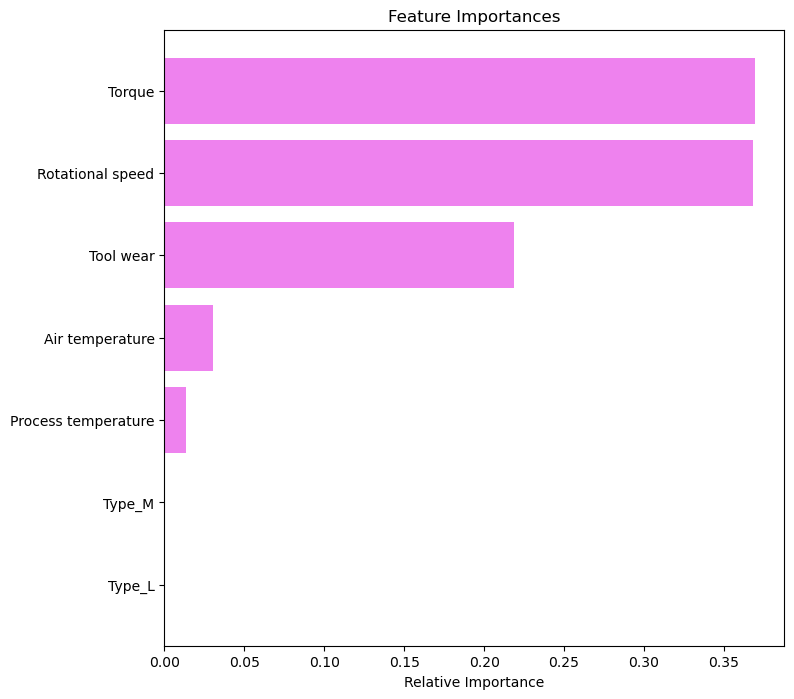

In [373]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre-pruned decision tree, torque and rotational speed are the most important features.

### Decision Tree (Post pruning)

- Cost complexity pruning provides another option to control the size of a tree.
- In `DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``.
- Greater values of ``ccp_alpha`` increase the number of nodes pruned.
- Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose the optimal ``ccp_alpha`` value.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [378]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [379]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.610449e-16
1,4.924112e-19,-1.605525e-16
2,4.924112e-19,-1.600601e-16
3,4.924112e-19,-1.595676e-16
4,7.107134e-18,-1.524605e-16
...,...,...
90,1.578143e-02,1.818710e-01
91,4.268458e-02,2.245555e-01
92,5.756867e-02,2.821242e-01
93,6.911602e-02,3.512402e-01


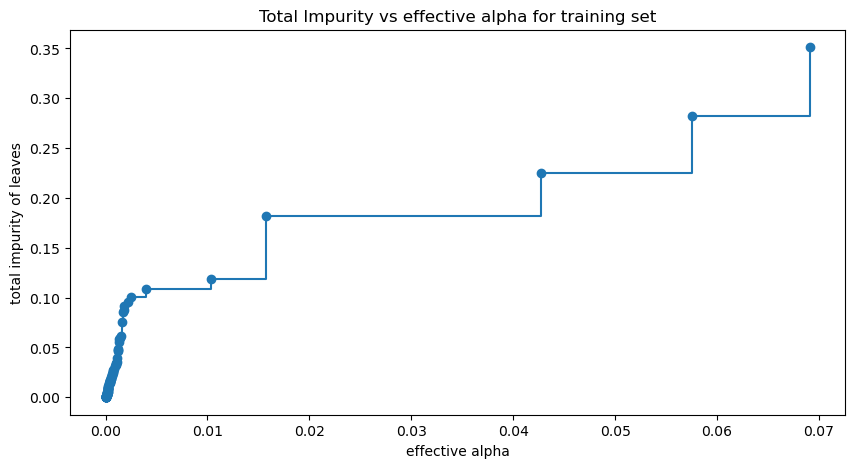

In [380]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [382]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14875976077076158


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

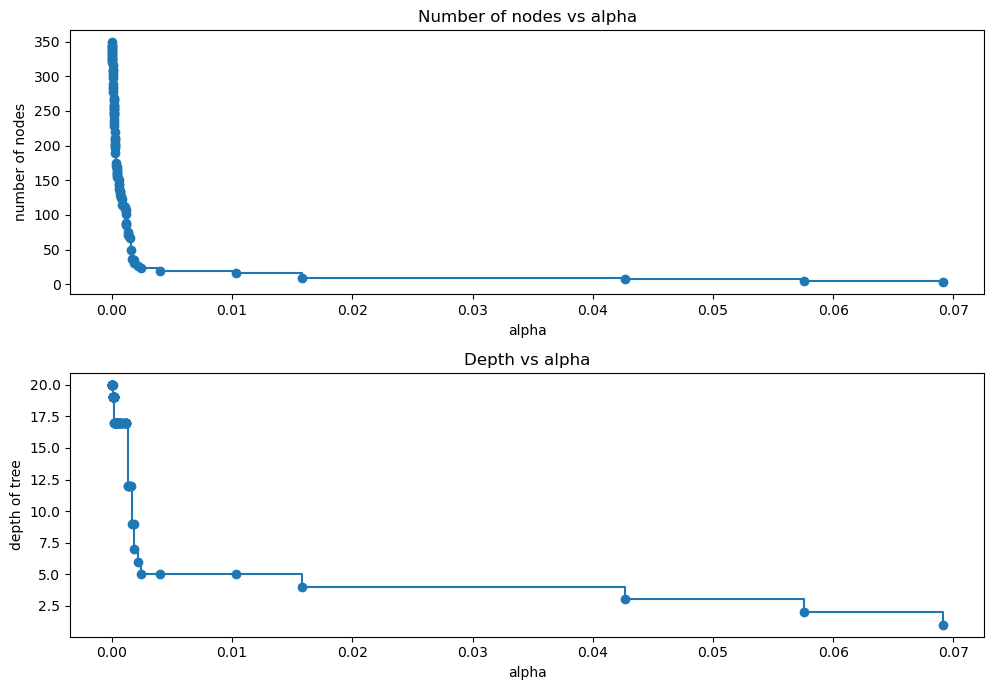

In [384]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [385]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [386]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [387]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

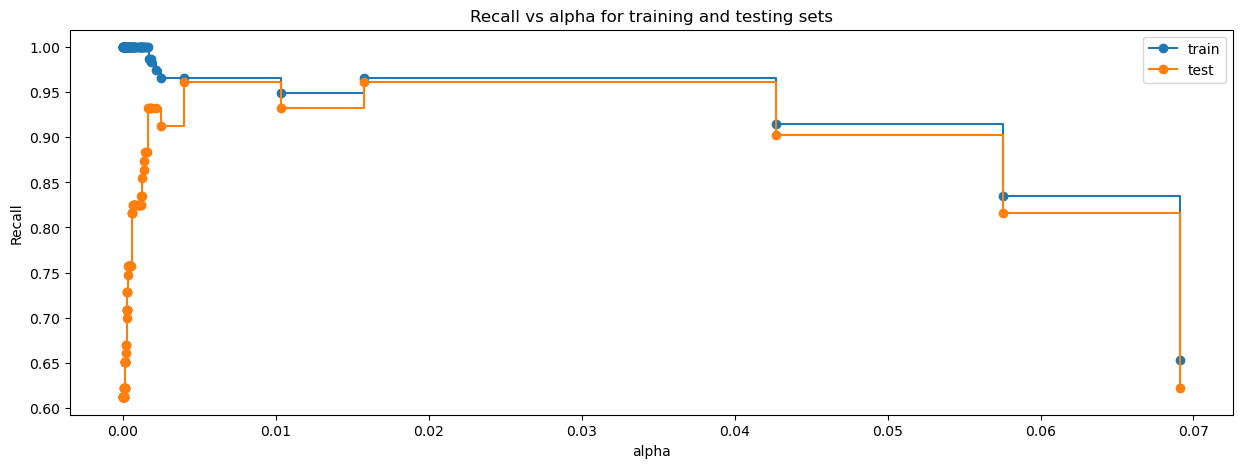

In [388]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [389]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004008680486241742, class_weight='balanced',
                       random_state=1)


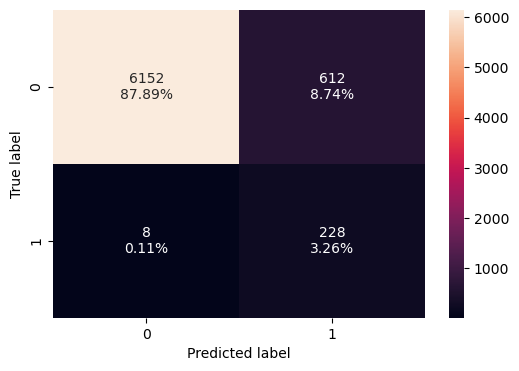

In [390]:
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [391]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.911429,0.966102,0.271429,0.423792


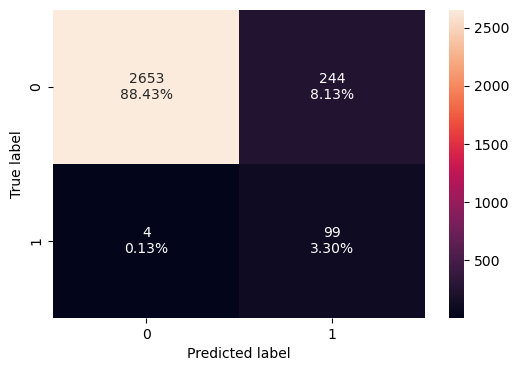

In [392]:
confusion_matrix_sklearn(model4, X_test, y_test)

In [393]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.917333,0.961165,0.28863,0.443946


* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.96 which shows that the model is able to generalize well on unseen data.

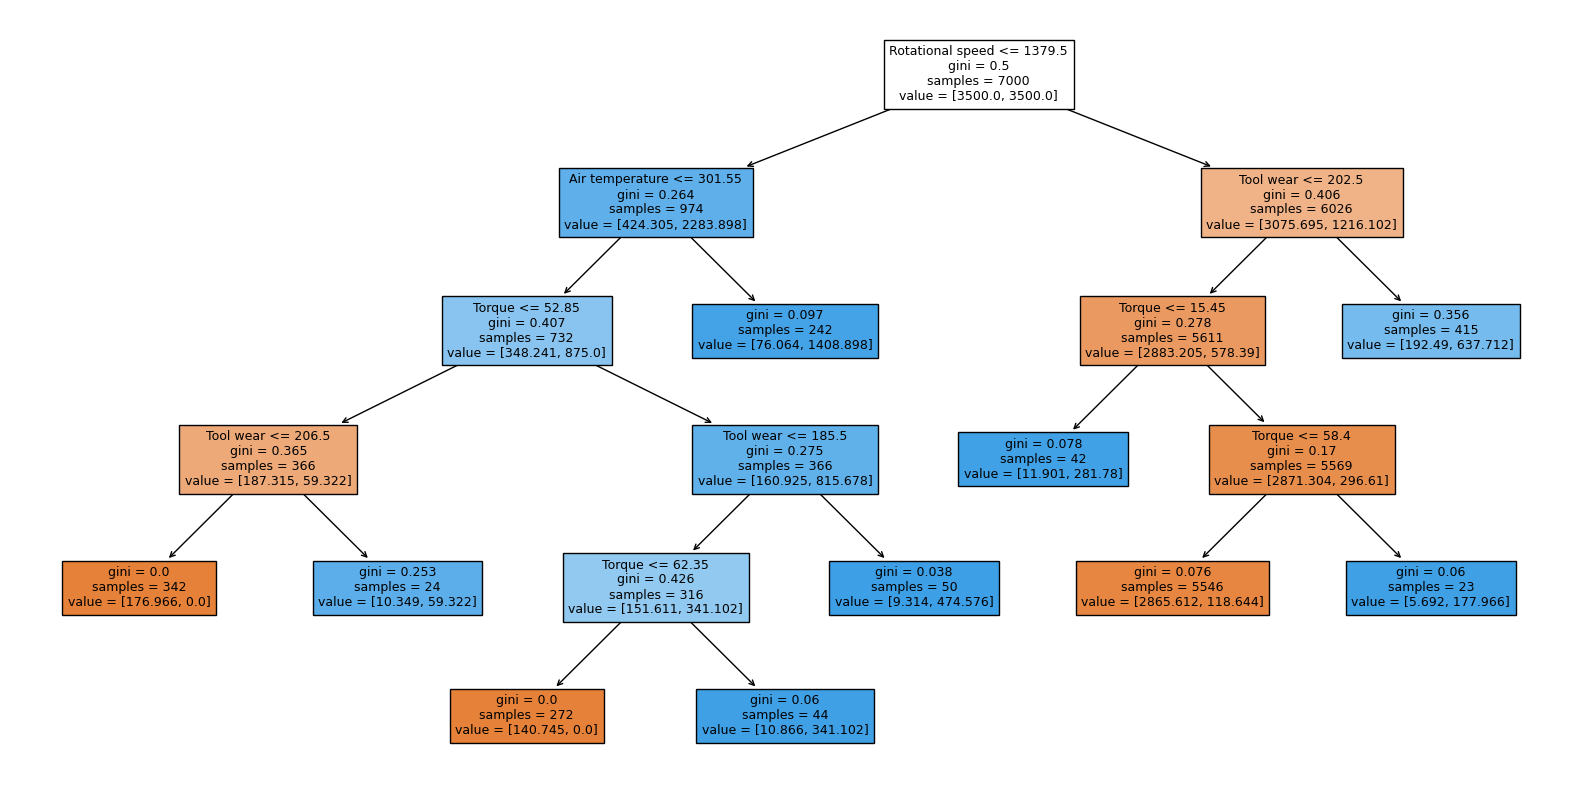

In [395]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [396]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))


|--- Rotational speed <= 1379.50
|   |--- Air temperature <= 301.55
|   |   |--- Torque <= 52.85
|   |   |   |--- Tool wear <= 206.50
|   |   |   |   |--- weights: [176.97, 0.00] class: 0
|   |   |   |--- Tool wear >  206.50
|   |   |   |   |--- weights: [10.35, 59.32] class: 1
|   |   |--- Torque >  52.85
|   |   |   |--- Tool wear <= 185.50
|   |   |   |   |--- Torque <= 62.35
|   |   |   |   |   |--- weights: [140.75, 0.00] class: 0
|   |   |   |   |--- Torque >  62.35
|   |   |   |   |   |--- weights: [10.87, 341.10] class: 1
|   |   |   |--- Tool wear >  185.50
|   |   |   |   |--- weights: [9.31, 474.58] class: 1
|   |--- Air temperature >  301.55
|   |   |--- weights: [76.06, 1408.90] class: 1
|--- Rotational speed >  1379.50
|   |--- Tool wear <= 202.50
|   |   |--- Torque <= 15.45
|   |   |   |--- weights: [11.90, 281.78] class: 1
|   |   |--- Torque >  15.45
|   |   |   |--- Torque <= 58.40
|   |   |   |   |--- weights: [2865.61, 118.64] class: 0
|   |   |   |--- Torque >  58

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [398]:
importances = model4.feature_importances_
indices = np.argsort(importances)

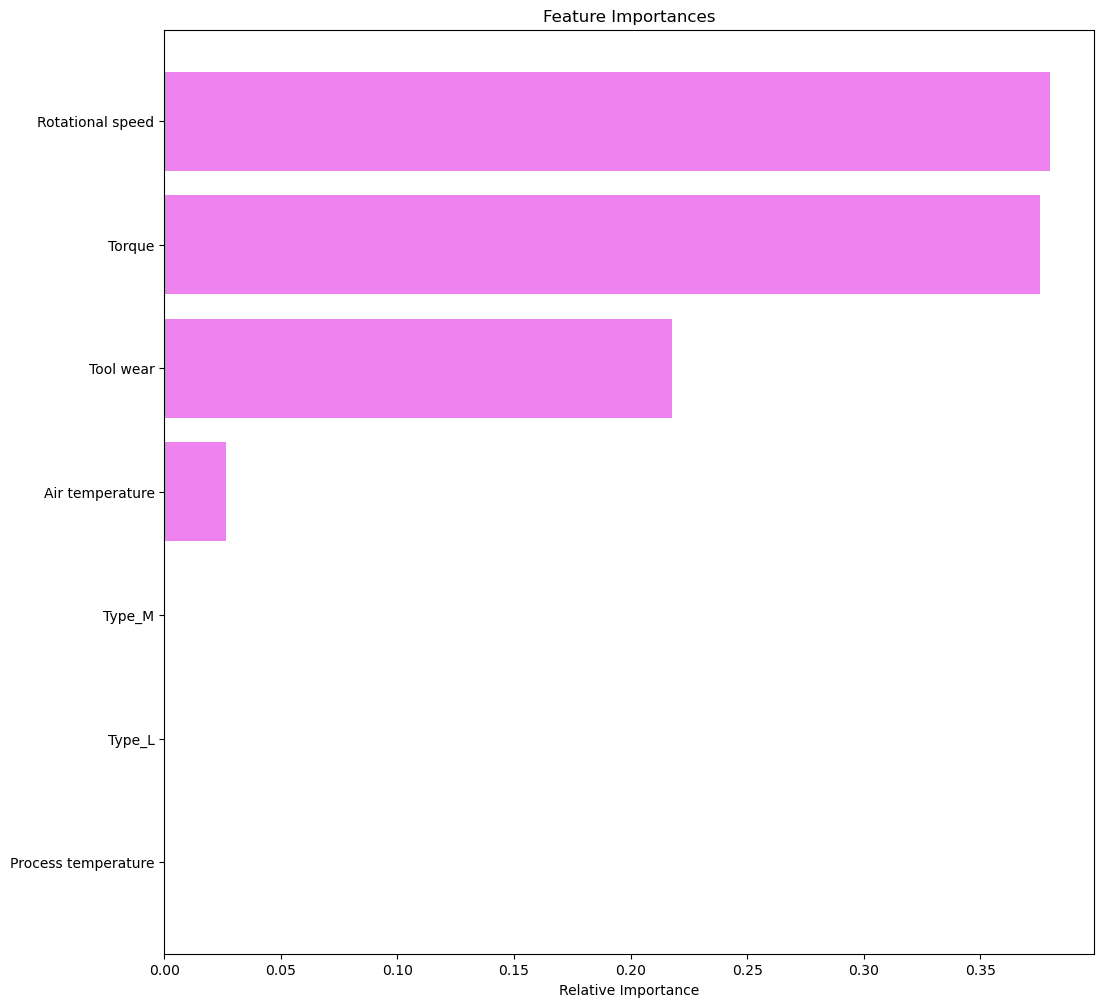

In [399]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Rotational speed and Torque are the most important features for the post pruned tree

## Comparison of Models and Final Model Selection

In [402]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.910286,0.911429
Recall,1.0,1.0,0.974576,0.966102
Precision,1.0,1.0,0.269953,0.271429
F1,1.0,1.0,0.422794,0.423792


In [403]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.975667,0.977000,0.916667,0.917333
Recall,0.728155,0.611650,0.970874,0.961165
Precision,0.625000,0.684783,0.288184,0.288630
F1,0.672646,0.646154,0.444444,0.443946


* Decision tree models with pre-pruning is giving high recall scores on both training and test sets.
* Therefore, we are choosing the pre-pruned tree as our best model.

## Conclusions and Recommendations

- The model built can be used to predict if a machine is going to fail or not and can correctly identify 97% of the machine failures

- Rotational speed, torque and tool wear are the most important variables in predicting whether a machine will fail or not


- From the decision tree, it has been observed that if the rotational speed is less than or equal to 1379.50, the air temperature is less than or equal to 301.55, the torque is less than or equal to 52.85 and the tool wear is greater than 206.50, then the machine is most likey to fail
  - The company should give a vigilant eye for these values in order to detect machine failure.


- The company should use more data for the analysis to get more reliable results


- As the variable used vary with the type of operation (turning, drilling, etc.) being performed, the company can look to build separate models for each different type of operation

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### Observation on Air temperature

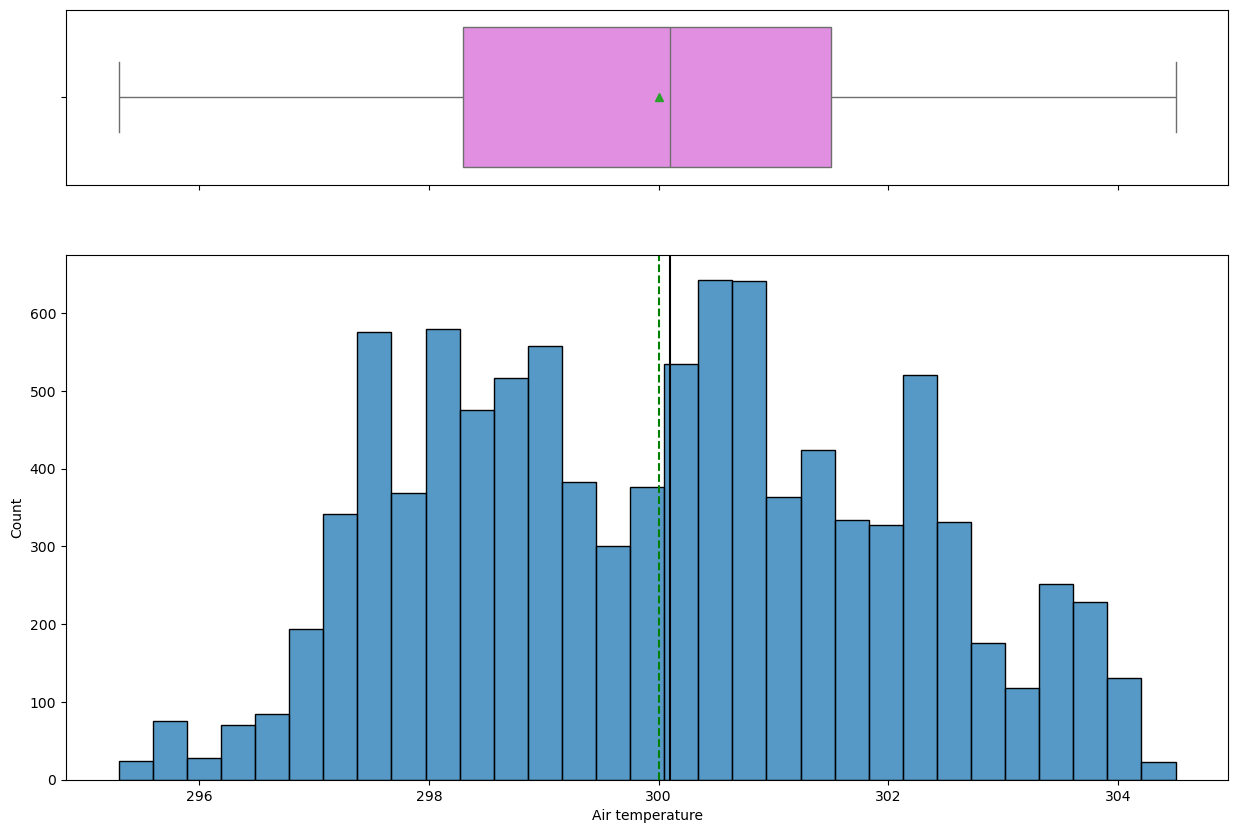

In [411]:
histogram_boxplot(data, "Air temperature")

* The `air temperature` distribution looks slightly left skewed with a mean temperature around 300K.
* There is no outlier present.

#### Observation on Process temperature

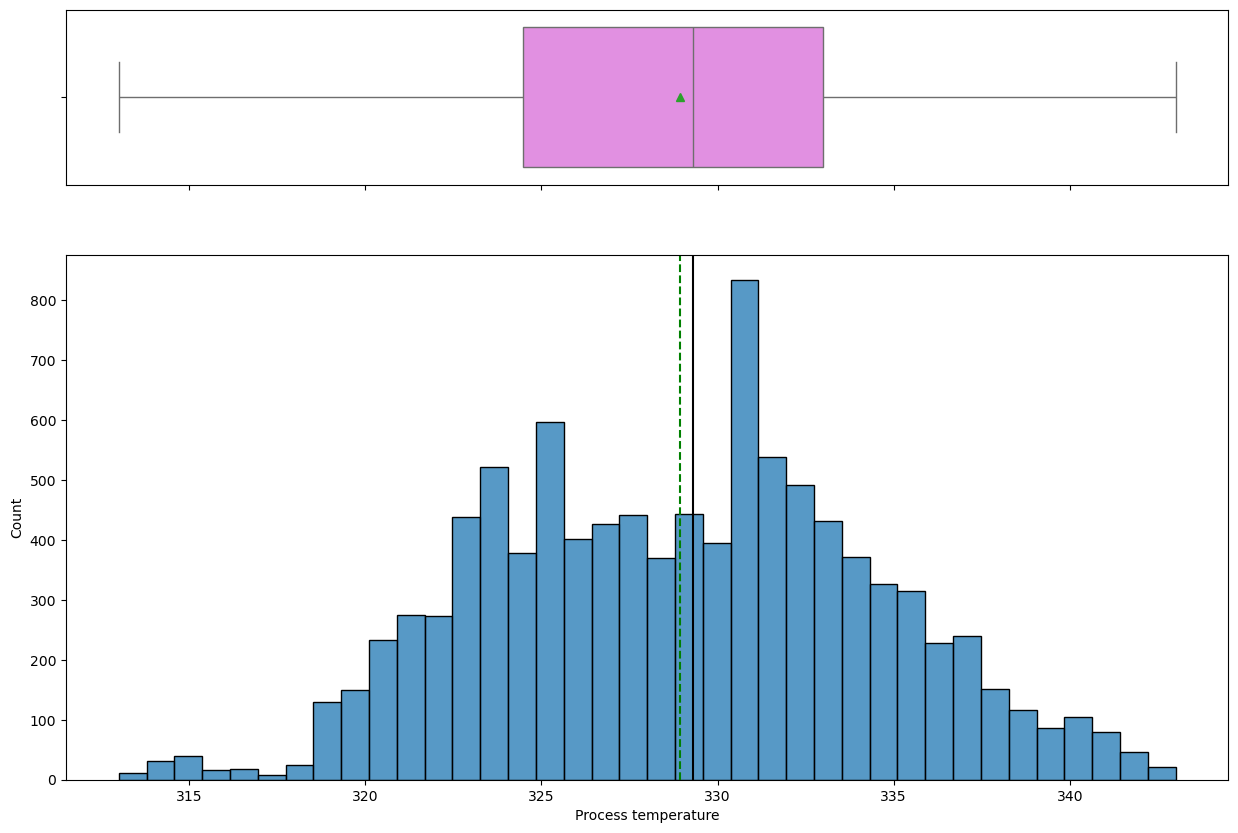

In [414]:
histogram_boxplot(data, "Process temperature")

* The `process temperature` distribution looks slightly left skewed with a mean temperature around 329K.
* There is no outlier present.

#### Observation on Rotational Speed

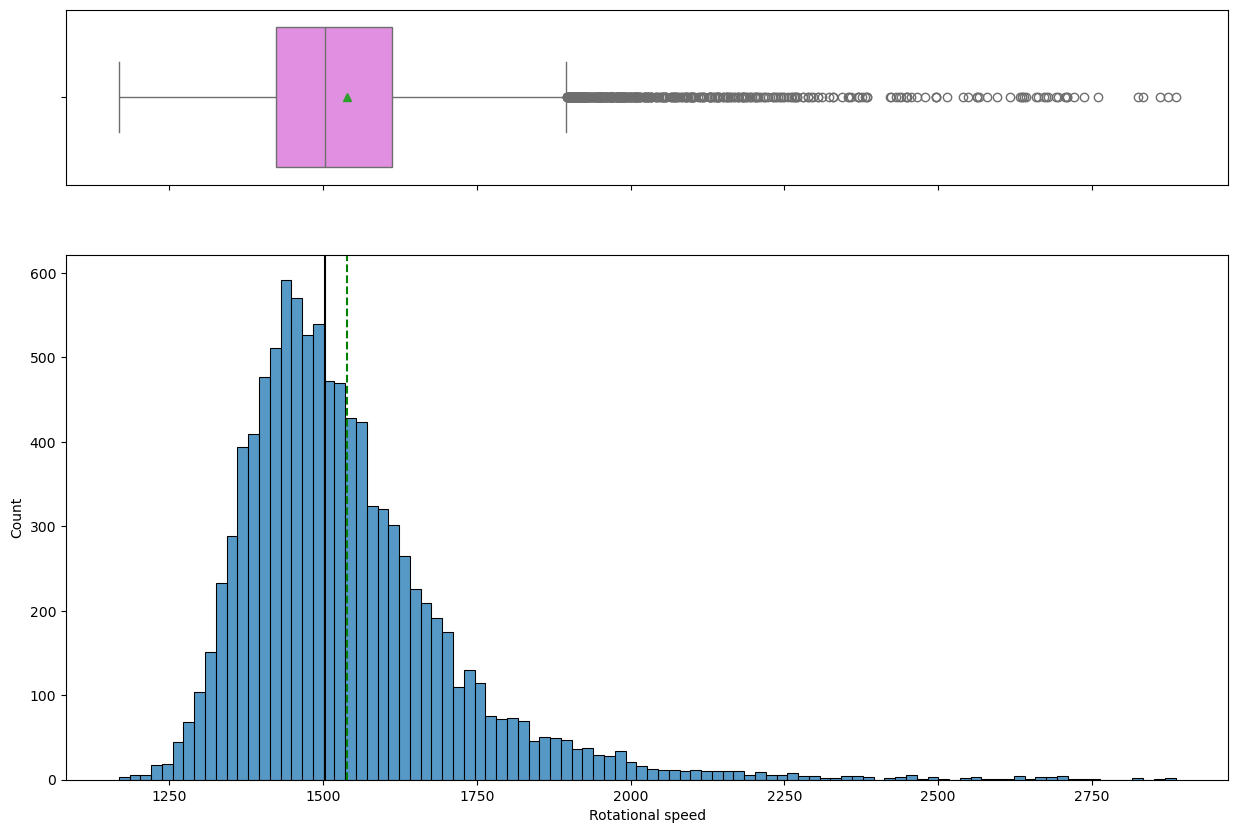

In [417]:
histogram_boxplot(data, "Rotational speed")

* The `rotational speed` is right skewed with many outliers on the upper quartile.
* Some of the manufacturing operations are performed at a higher speed.

#### Observation on Torque

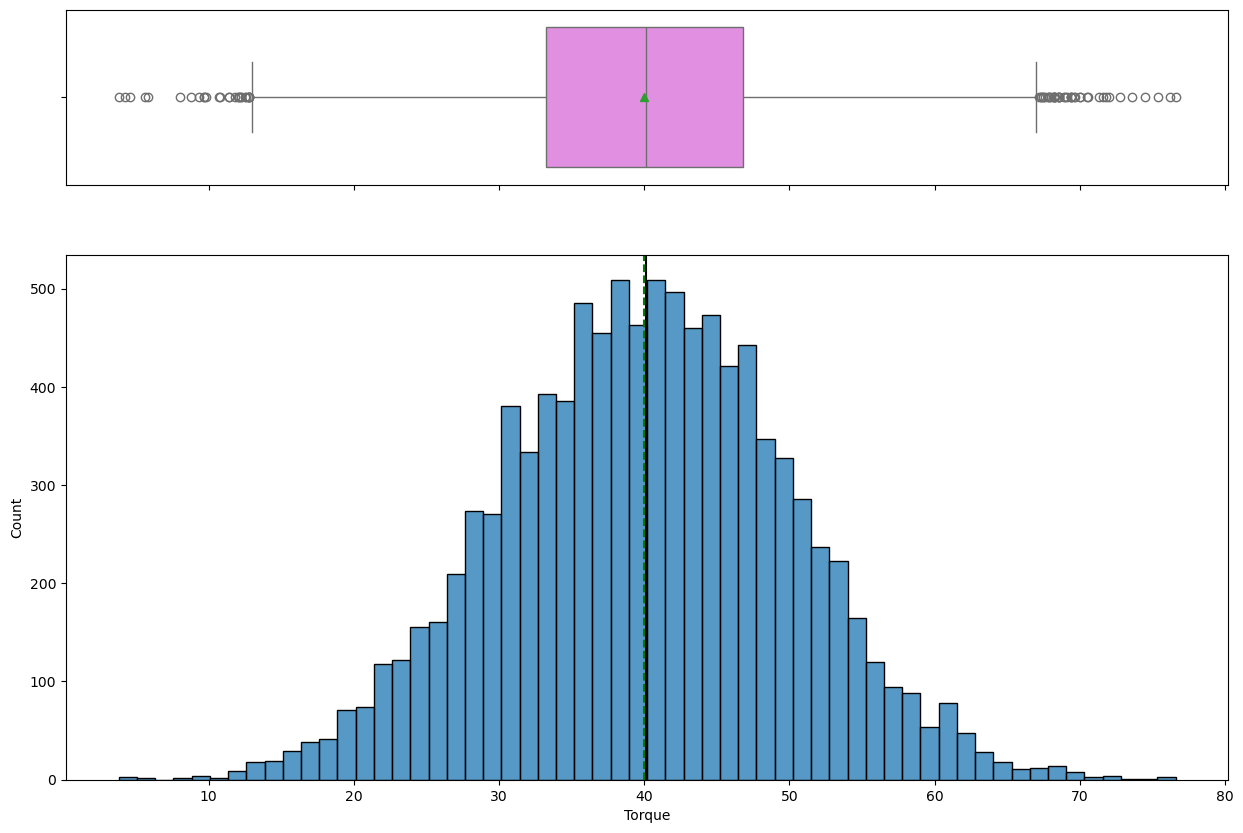

In [420]:
histogram_boxplot(data, "Torque")

* The distribution of `torque` is normal with mean torque around 40 Nm.
* Outliers are present on both sides.

#### Observation on Tool Wear

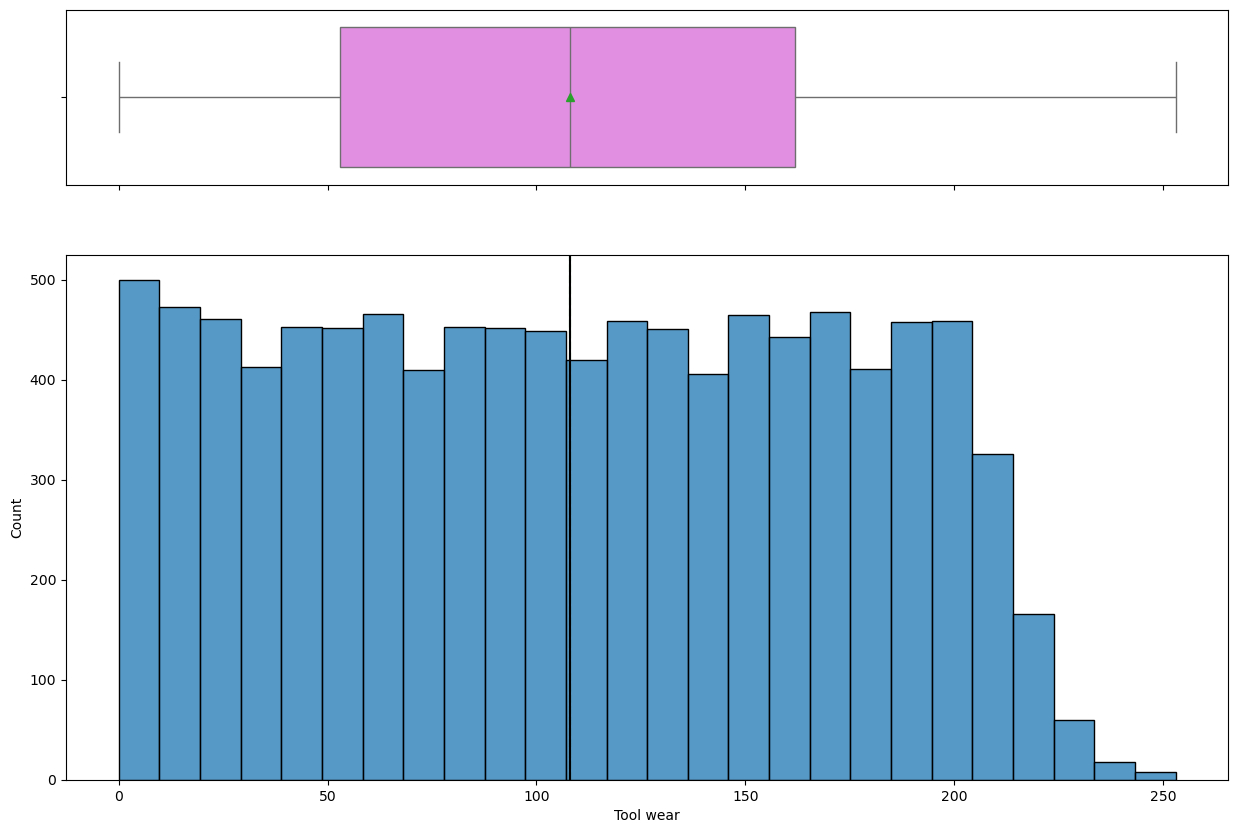

In [423]:
histogram_boxplot(data, "Tool wear")

* `Tool wear` is uniformly distributed with some of the higher values being less frequent.

#### Observation on Type of product

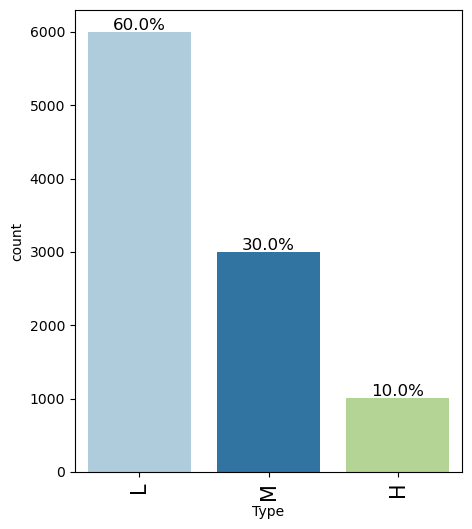

In [426]:
labeled_barplot(data, "Type", perc=True)

* Around 60% of products are of low quality, 30% are of medium quality whereas 10% are of high quality

#### Observation on `Failure`

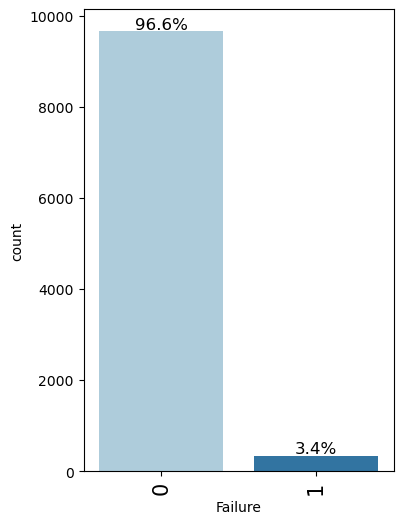

In [429]:
labeled_barplot(data, "Failure", perc=True)

* In 96.6% of observations the machine does not fail while in 3.4% of observations it fails.

### Bivariate Analysis

#### Correlation Check

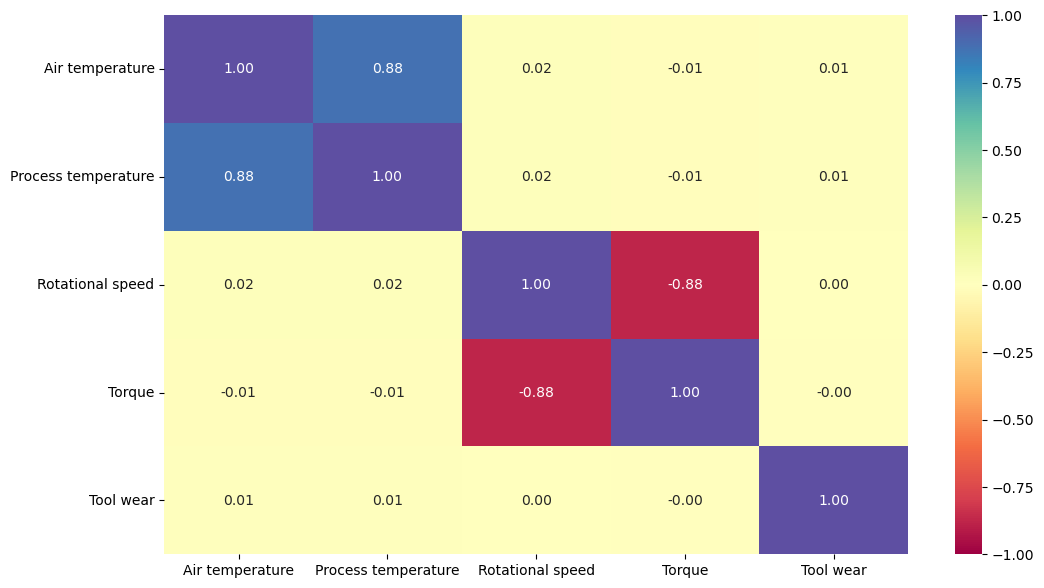

In [433]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('Failure')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a positive correlation between the `air temperature` and `process temperature`.
* There's a negative correlation between the `rotational speed` and `torque`.
* No other variables are correlated. We will analyze it further.

#### Observation on `Type` vs `Air temperature`

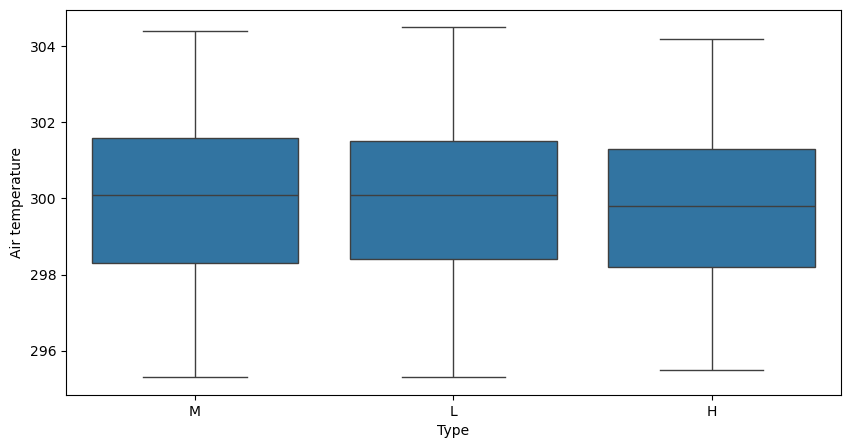

In [436]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Air temperature")
plt.show()

* There is no distinct difference in values of `Air temperature` and `Type`

#### Observation on `Type` vs `Process temperature`

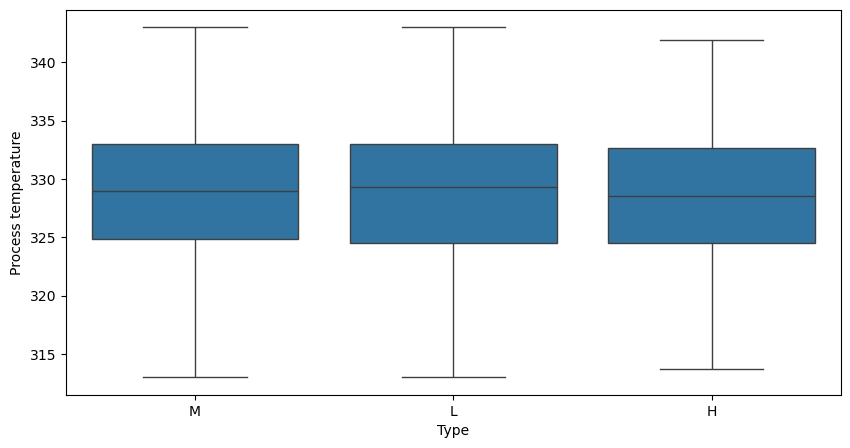

In [439]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Process temperature")
plt.show()

* There is no distinct difference in values of `Process temperature` and `Type` for M and L types.
* Lesser `Process temperature` is observed in manufacturing H type of products.

#### Observation on `Type` vs `Rotational speed`

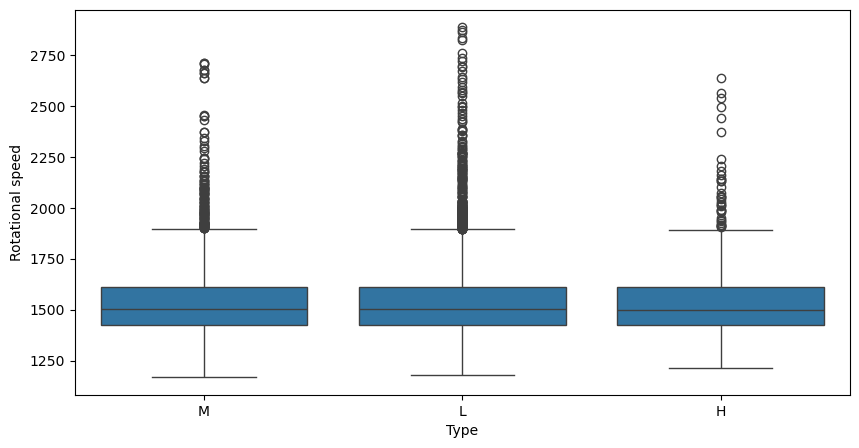

In [442]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Rotational speed")
plt.show()

* Some of the L type of products are manufactured at higher rotational speed

#### Observation on `Type` vs `Tool wear`

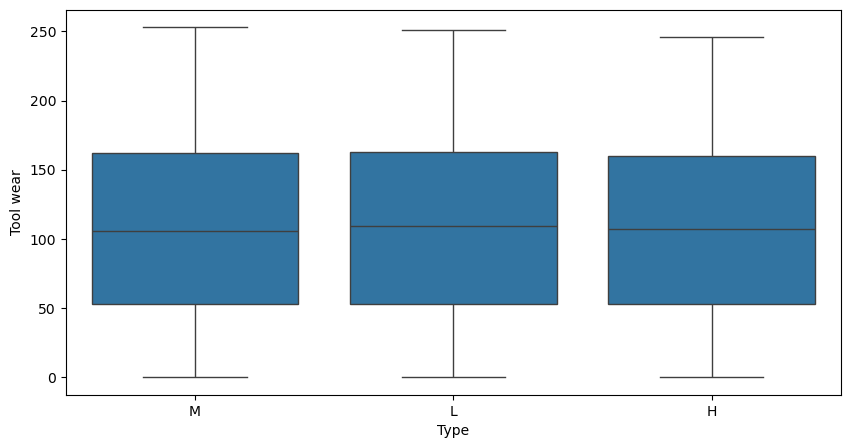

In [445]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Tool wear")
plt.show()

* There is no distinct difference in values of `Tool wear` and `Type`

#### Observation on `Type` vs `Torque`

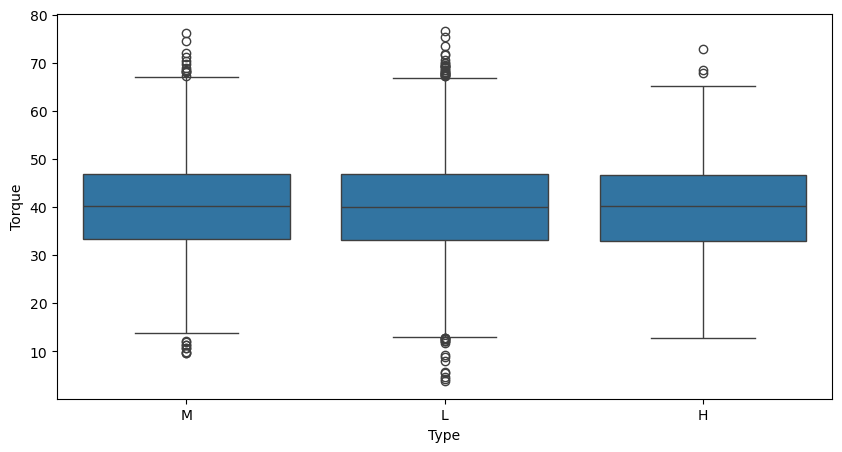

In [448]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Torque")
plt.show()

* Some of the L type products are manufactured at lower `Toque` as compared to M and H type of products.

#### Failure vs Type

**Let's see how the target variable varies across the type of the product**

Failure     0    1    All
Type                     
All      9661  339  10000
L        5765  235   6000
M        2914   83   2997
H         982   21   1003
------------------------------------------------------------------------------------------------------------------------


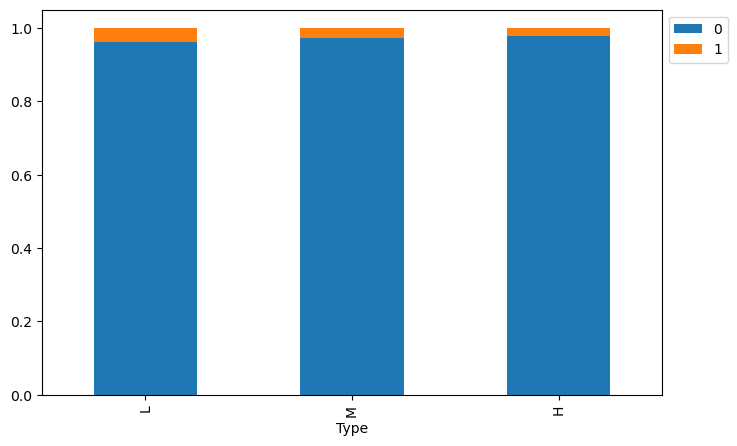

In [452]:
stacked_barplot(data, "Type", "Failure")

* Around 70 % of the failure occurred during machining of L type i.e., low-quality products.
* Machining of high-quality products is less prone to failure.

#### Distribution of numerical input variables by failure status

**Let's analyze the relation between `Air temperature` and `Failure`.**

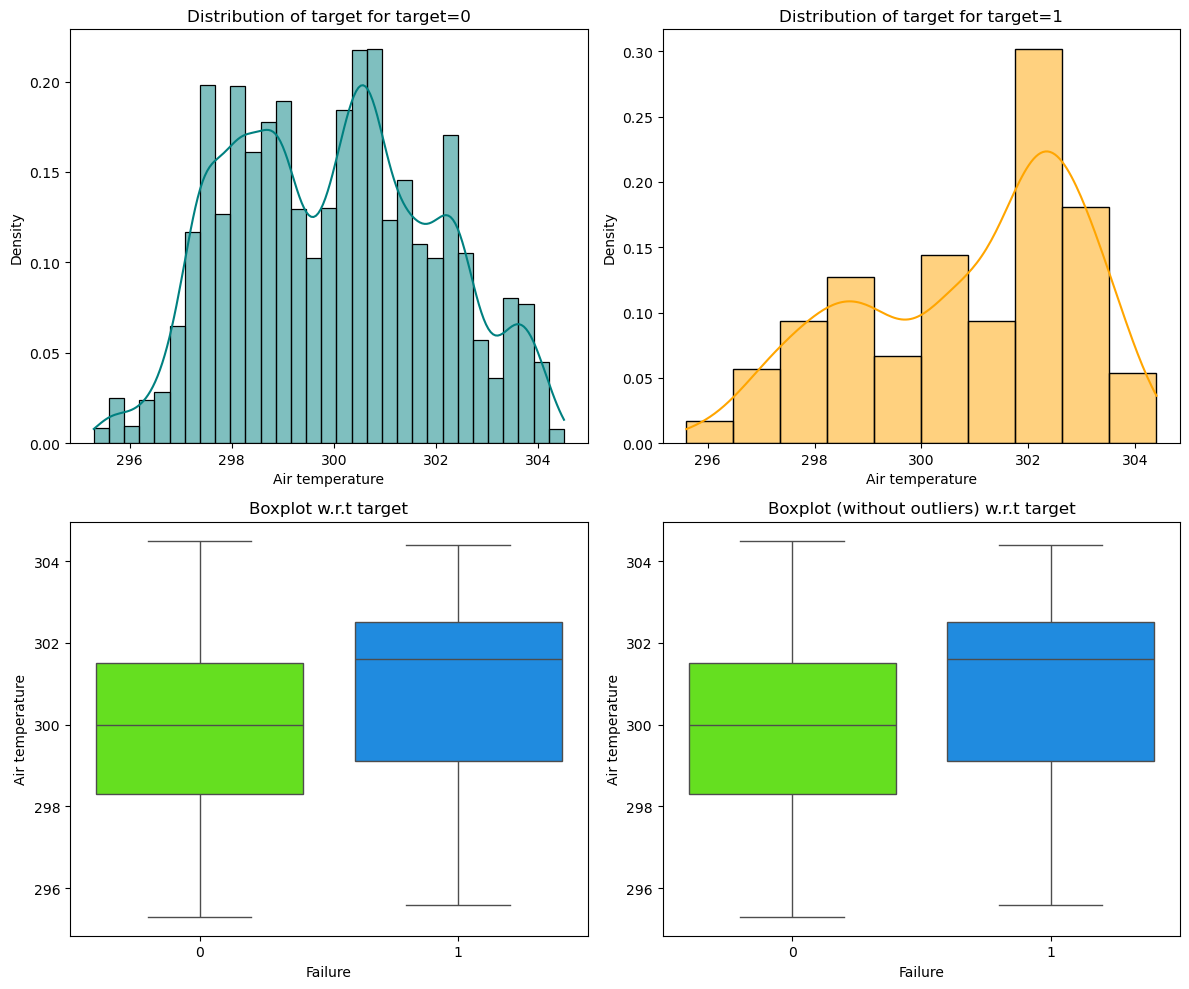

In [456]:
distribution_plot_wrt_target(data, "Air temperature", "Failure")

* Most of the failures of the manufacturing system occur at higher `Air temperature`.


**Let's analyze the relation between `Process temperature` and `Failure`.**

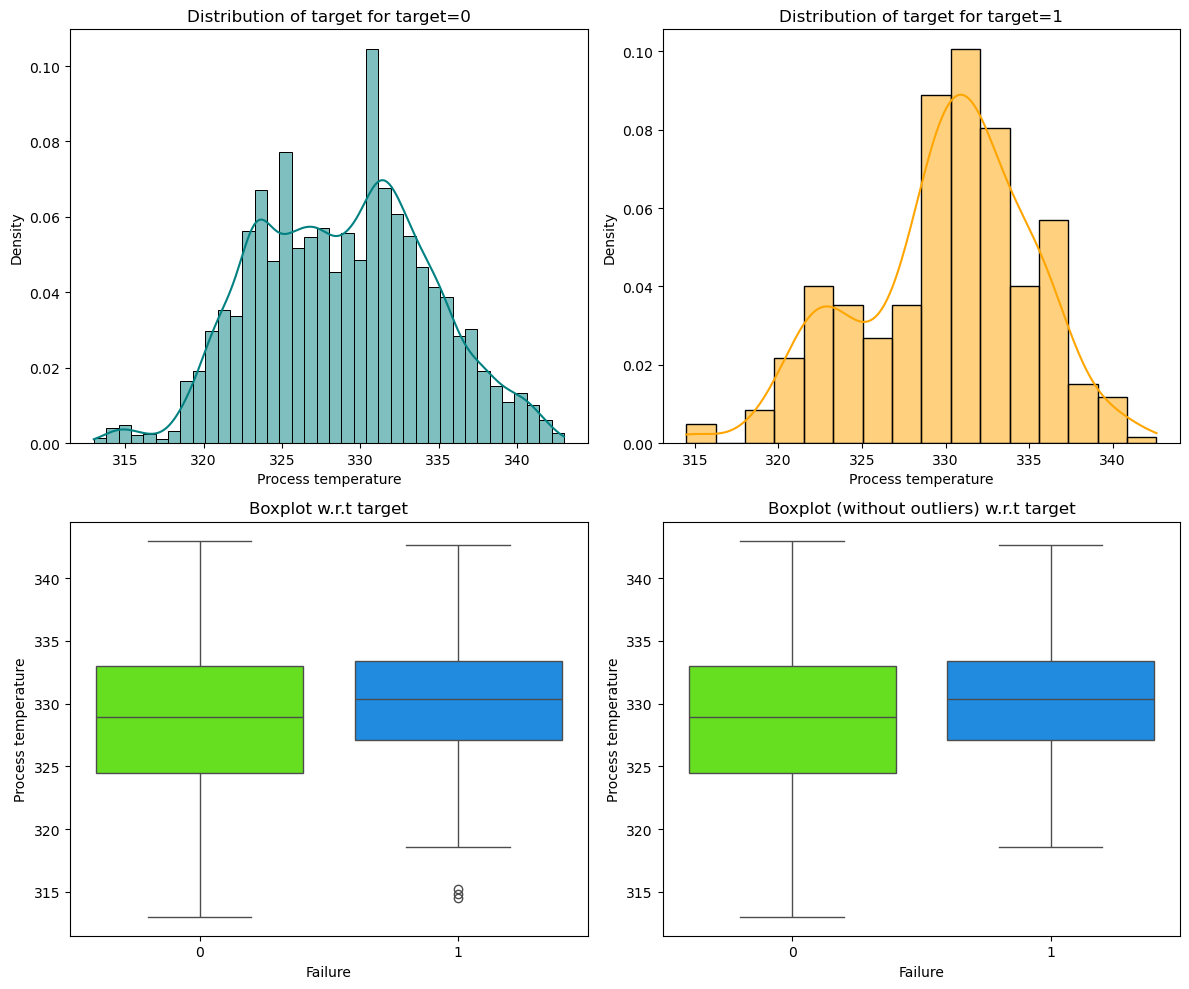

In [459]:
distribution_plot_wrt_target(data, "Process temperature", "Failure")

* Most of the failures of the manufacturing system occur at higher `Process temperature`.

**Let's analyze the relation between `Rotational speed` and `Failure`.**

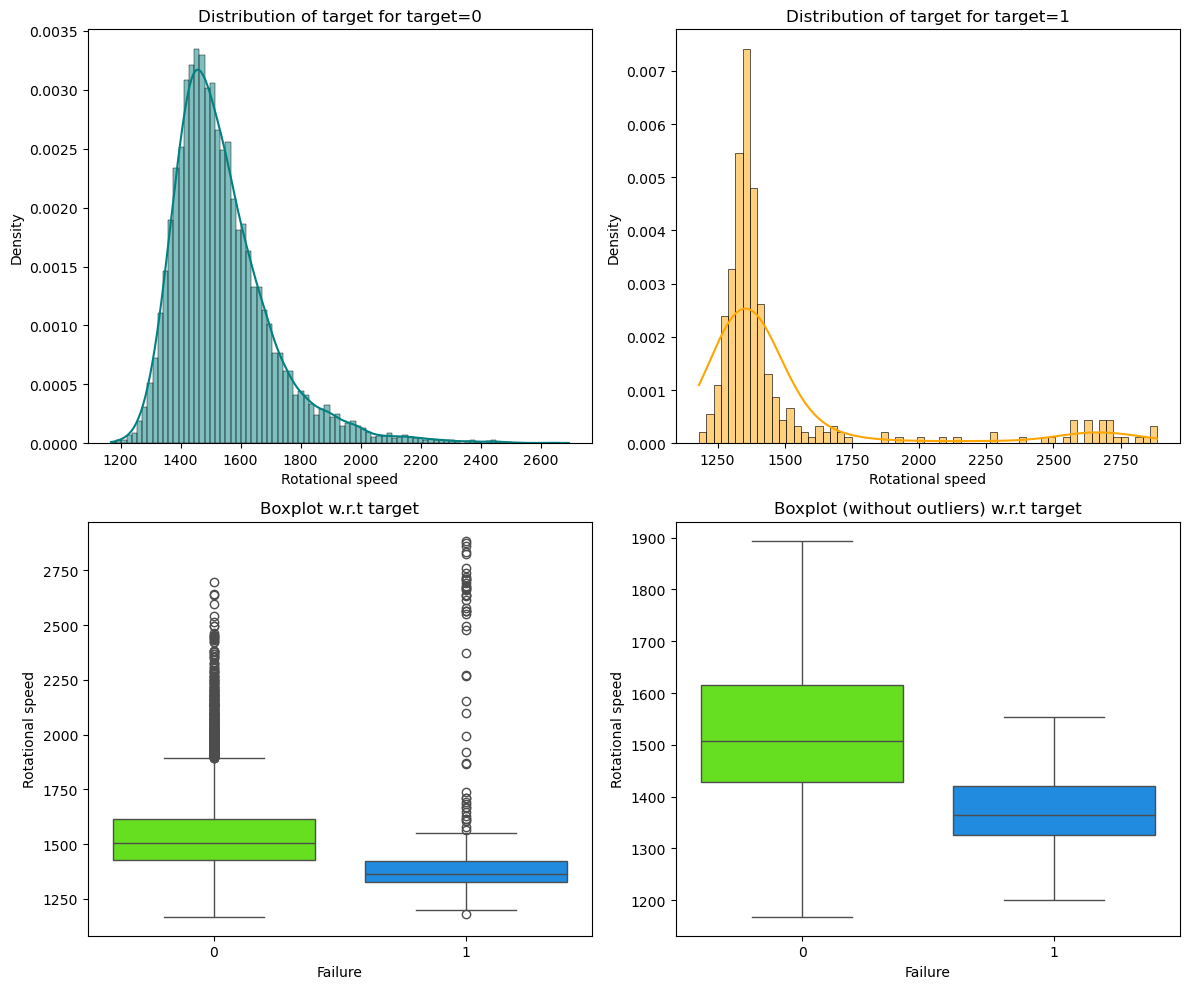

In [462]:
distribution_plot_wrt_target(data, "Rotational speed", "Failure")

* Manufacturing system is more prone to failure at lower `Rotational speed` than at higher rotational speed.

**Let's analyze the relation between `Torque` and `Failure`.**

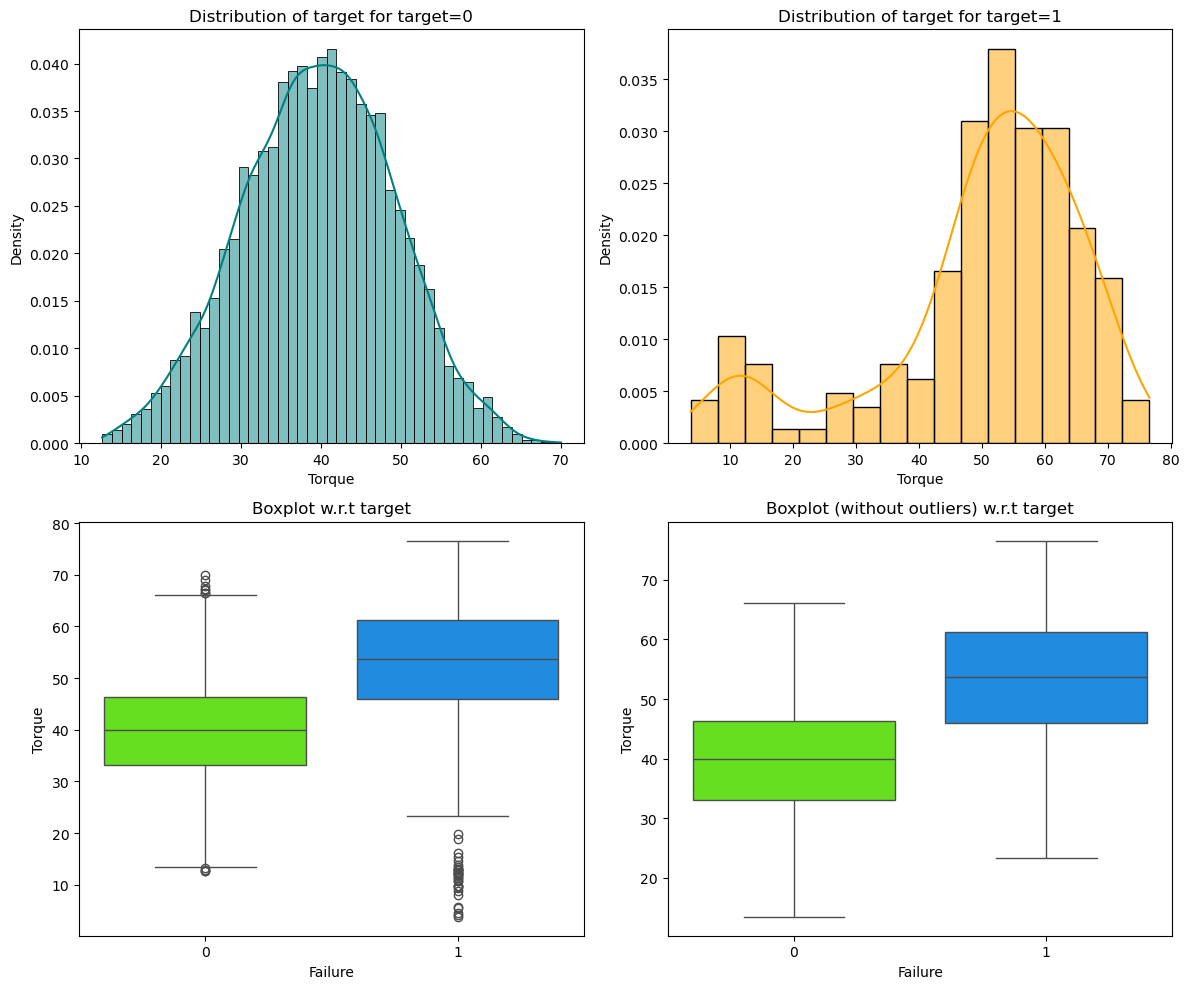

In [465]:
distribution_plot_wrt_target(data, "Torque", "Failure")

* Most of the failures of the manufacturing system occur at higher torque as compared to lower values of torque.

**Let's analyze the relation between `Tool wear` and `Failure`.**

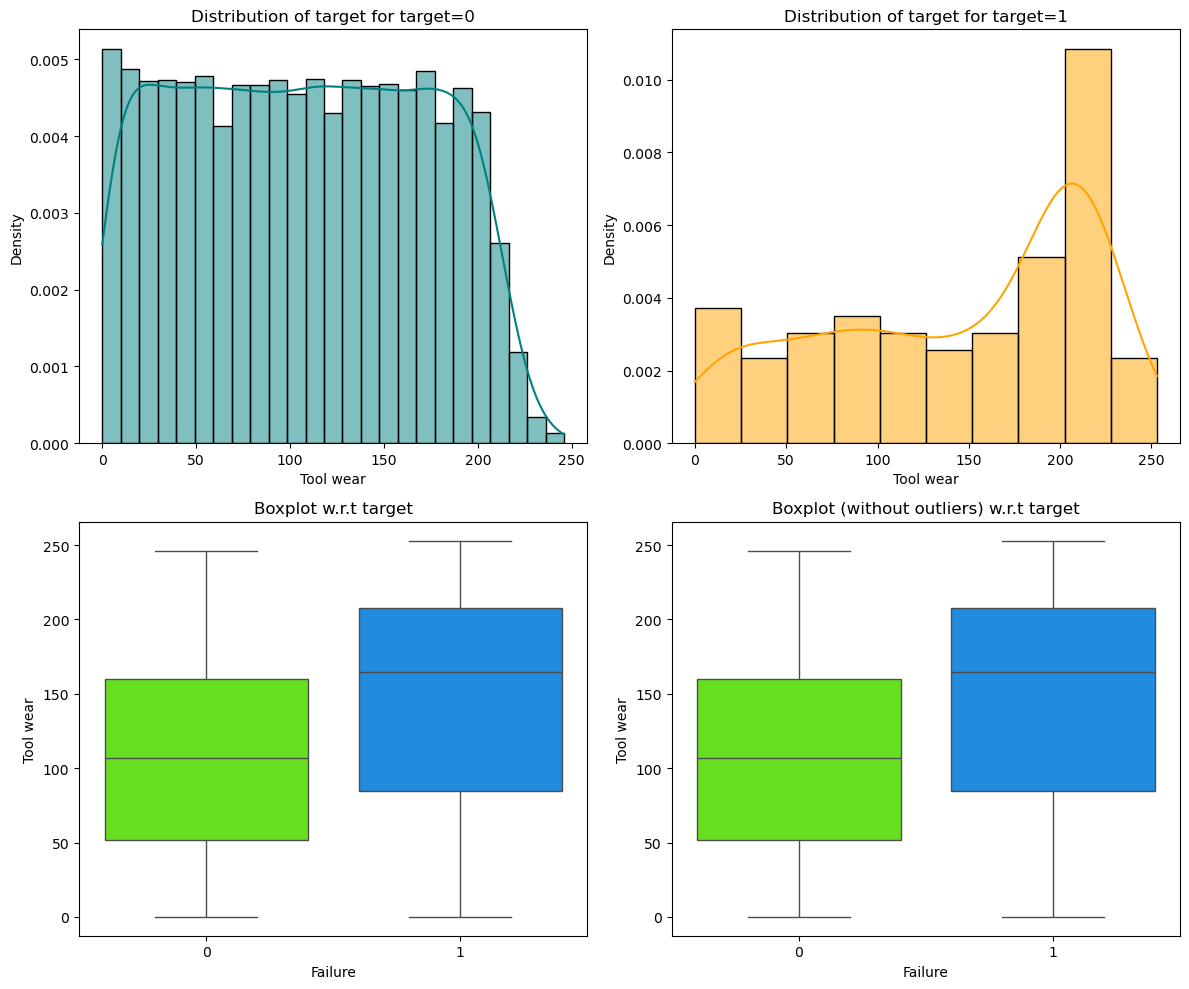

In [468]:
distribution_plot_wrt_target(data, "Tool wear", "Failure")

* Most of the failures occur at higher values of tool wear than at lower tool wear.

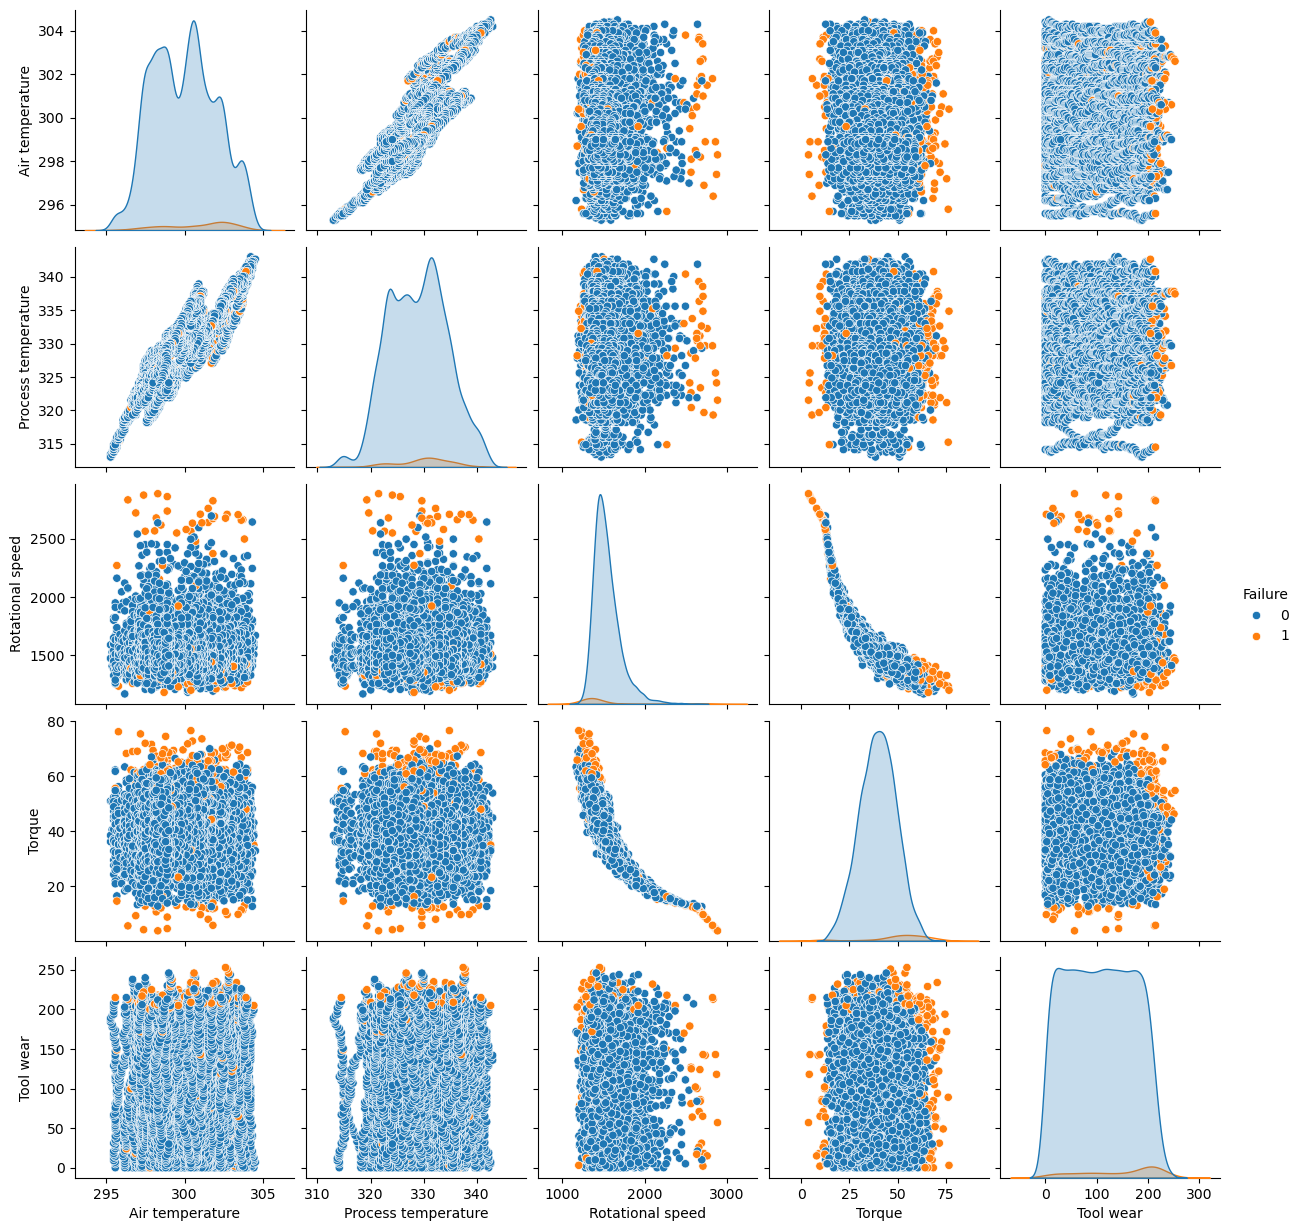

In [470]:
sns.pairplot(data, hue="Failure")

- The correlation between air temperature and process temperature and torque and rotational speed is visible here too

### To jump back to the EDA summary section, click <a href = #link2>here</a>.

___